<H1> Les jeux de données pour le projet </H1>

Dans ce notebook nous présentons les jeux de données utilisés pour le projet. Nous proposons également des fonctions pour permettre de pouvoir facilement les données.   

Il n'y a donc plus qu'à chercher les meilleurs modèles et à répondre aux questions de l'énoncé du projet.   

Bon courage !

ps : il y a trois jeux de données et ils sont très différents donc attention vous aurez peut être 3 modèles différents.

### Installation



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



In [ ]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...

# sous Colab il faut déjà intégrer ces deux librairies

!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

# eventuellement ne pas oublier de relancer le kernel du notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=62c8e5581847c1be1dbc8549a0c5d896b96415e01216bd4191feb7f2a293f422
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 862.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
import math

from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# TensorFlow et keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU, ReLU
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, RMSprop , Adamax, Adam
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob

In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()


def plot_curves(histories):
    plt.figure(1,figsize=(16,6))
    plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
    for i in range(len(histories)):
    	# plot loss
    	plt.subplot(121)
    	plt.title('Cross Entropy Loss')
    	plt.plot(histories[i].history['loss'], color='blue', label='train')
    	plt.plot(histories[i].history['val_loss'], color='red', label='test')
    	plt.ylabel('loss')
    	plt.xlabel('epoch')
    	plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    	# plot accuracy
    	plt.subplot(122)
    	plt.title('Classification Accuracy')
    	plt.ylabel('accuracy')
    	plt.xlabel('epoch')
    	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    	plt.plot(histories[i].history['val_accuracy'], color='red',
                 label='test')
    	plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
# pour monter son drive Google Drive local
#from google.colab import drive
#drive.mount('/content/gdrive')

Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive :

In [ ]:
#import sys
#my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
#sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
#%cd $my_local_drive

#%pwd

####Les jeux de données


Récupération des jeux de données :      

In [ ]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

--2023-12-13 22:36:27--  https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
Resolving www.lirmm.fr (www.lirmm.fr)... 193.49.104.251
Connecting to www.lirmm.fr (www.lirmm.fr)|193.49.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7605545 (7.3M) [application/zip]
Saving to: ‘Tiger-Fox-Elephant.zip.1’

Tiger-Fox-Elephant. 100%[===================>]   7.25M  8.19MB/s    in 0.9s    

2023-12-13 22:36:28 (8.19 MB/s) - ‘Tiger-Fox-Elephant.zip.1’ saved [7605545/7605545]



In [ ]:
import zipfile
with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    zip_ref.extractall("Data_Project")


Il y a trois jeux de données différents : des tigres, des éléphants et des renards. Pour chacun d'entre eux il y a un ensemble d'images positive et un ensemble d'images négatives. Par exemple dans le répertoire *tiger* il n'y a que des images de tigre et dans le répertoire *Tiger_negative_class* il n'y a que des images d'animaux qui ne correspondent pas à des tigres.   

Le code ci-dessous permet de visualiser quelques images contenues dans le répertoire *tiger*.

In [ ]:
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )


COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

Output hidden; open in https://colab.research.google.com to view.

Nous pouvons constater que les images ne sont pas de la même taille. Il faut donc les convertir. Une manière simple de faire et de faire la conversion lors de la lecture des images : ici nous convertissons toutes les images en 124x124.

In [ ]:
IMG_SIZE=124
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
  images[n]  = cv2.resize(images[n], (IMG_SIZE, IMG_SIZE))

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

Output hidden; open in https://colab.research.google.com to view.

# **Créer le jeu de données**   

Actuellement pour chaque animal nous avons un répertoire qui contient des images positives et un répertoire qui contient des images négatives. Pour pouvoir créer un jeu de données nous devons obtenir X et y. Les fonctions ci-dessous permettent de générer, à partir des répertoires, un jeu de données aléatoire pour X et y.

In [ ]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

def plot_examples(X,y):
  plt.figure(figsize=(15,15))
  for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(X[i]/255.,cmap=plt.cm.binary)
    plt.xlabel('classe ' + str(y[i]))

Définition de constante globale      


In [ ]:
# constantes globales

IMG_SIZE=124  #Taille de l'image
COLUMNS = 25 # Nombre d'images à afficher

Pour les tigres :

In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['tiger','Tiger_negative_class']
X,y=create_X_y (my_path,my_classes)
print ("Nombre de données : ",X.shape[0])
print ("Taille d'une image pour connaître l'input du réseau", X[0].shape)
print ("Distribution des labels dans le jeu d'apprentissage")
sns.countplot(np.array(y))
plt.title("Nombre d'éléments par classe")
# affichage
plot_examples(X,y)

# Surtout ne pas oublier de normaliser les données avec :
X=X.astype('float')
X=X/255.0

Output hidden; open in https://colab.research.google.com to view.

# Modèle Baseline


Tout d'abord nous avons créé un modèle de classifier de base (baseline) (1 seule couche de CNN) et évalué sur les différents jeux de données.

Première fonction permet de charger le jeu de données.

La fonction train_test_split est couramment utilisée en apprentissage automatique (machine learning) pour diviser un ensemble de données en deux sous-ensembles distincts : un ensemble d'entraînement (training set) et un ensemble de test (test set). Cette division est cruciale pour évaluer les performances d'un modèle sur des données qu'il n'a pas vues pendant l'entraînement.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#en entrée (my_classes) : une liste de deux str
#exemple my_classes = ["elephant", "Elephant_negative_class"]
def load_dataset(my_classes):
  #chargement des données
  my_path="Data_Project/Tiger-Fox-Elephant/"
  X,y = create_X_y(my_path,my_classes)
  X_train,X_test , y_train, y_test  = train_test_split(X,y, test_size = 0.15)

  return X_train, y_train, X_test, y_test

Seconde fonction nettoie les données : conversion en float et normalisation pour éviter les trop grandes valeurs

In [ ]:
def clean_data(train, test):
    # convertion d'entier en float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalisation entre 0 et 1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

Pour évaluer le modèle nous utilisons un K-fold. Pour que les expérimentations ne durent pas trop longtemps le nombre de folds par défaut est fixé 5 et le nombre de d'épochs à 30.

In [ ]:
 #Evaluation avec un k-fold
def evaluate_model(model, dataX, dataY, n_folds=5, epochs=30):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    #on veut enregistrer tous les modèles pour ensuite évaluer les données de test sur le meilleur
    liste_model = []

    # parcourir les splits du k-fold
    for train_ix, test_ix in kfold.split(dataX):
        #clone model
        model_kfold = tf.keras.models.clone_model(model)

        #compile model
        model_kfold.compile(optimizer=SGD(learning_rate=0.01, momentum =0.9), loss='binary_crossentropy',metrics=['accuracy'])
        print(model_kfold.summary())

        # selection des données
        X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

        #EarlyStopping pour éviter l'augmentation de la courbe validation loss
        #earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

        # fit du modele
        history = model_kfold.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)
        # evaluate du modele
        loss, acc = model_kfold.evaluate(X_test, y_test, verbose=0)
        print('accuracy %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
        liste_model.append(model_kfold)

    return scores, histories, liste_model


A présent, nous considérons le modèle.  Pour le modèle baseline nous allons faire un modèle assez simple : une couche conv2D et un pooling
suivi bien entendu par un flatten et une couche dense avant d'avoir une couche finale avec un sigmoid. La taille du filtre est de 3x3 et il y a 32
filtres :

In [ ]:
 #definition du premier modèle baseline
def define_model():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     name="Conv2D_1"))

    model.add(MaxPooling2D(pool_size=(2, 2),
                           name="Maxpooling2D_1"))
    # flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    return model

La fonction suivante permet de lancer l'ensemble des fonctions précédentes.


Evaluation du modèle et affichage des différentes courbes pour les k folds.

In [ ]:
def data_load_clean(my_classes):
    # load dataset
    X_train, y_train, X_test, y_test = load_dataset(my_classes)
    # Nettoyage et normalisation
    X_train, X_test = clean_data(X_train, X_test)

    return X_train, y_train, X_test, y_test

def clean_load_Xy(my_classes, my_path):
  X,y = create_X_y(my_path,my_classes)
  x_norm = X.astype('float32')
    # normalisation entre 0 et 1
  x_norm = x_norm / 255.0
  return x_norm, y

def run_evaluation(n_folds,epochs,X_train, y_train):

    # define model
    model = define_model()
    print(model.summary())

    scores, histories, liste_k_model = evaluate_model(model, X_train, y_train, n_folds,epochs)
    plot_curves_subplot(histories)
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

    return liste_k_model

def plot_curves_subplot(histories):
    #on arrondi au sup pour qu'il y ait assez de subplot pour chaque history
    nb_subplot = len(histories)
    fig = plt.figure(figsize=(16,32))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    iterator = 1
    for i in range(len(histories)):

      ax = fig.add_subplot(nb_subplot, 2, iterator)
      ax.plot(histories[i].history['val_loss'], color='red', label='test')
      ax.plot(histories[i].history['loss'], color='blue', label='train')
      ax.set_ylabel('loss')
      ax.set_xlabel('epoch')
      ax.legend(['Validation loss', 'Training loss'], loc='upper left')

      iterator+=1

      ax = fig.add_subplot(nb_subplot, 2, iterator)
      ax.plot(histories[i].history['val_accuracy'], color='red', label='test')
      ax.plot(histories[i].history['accuracy'], color='blue', label='train')
      ax.set_ylabel('accuracy')
      ax.set_xlabel('epoch')
      ax.legend(['Validation accuracy', 'Training accuracy'], loc='upper left')

      iterator+=1

    plt.show()



## RUN

In [ ]:
#séparation des données
my_classes = ['elephant','Elephant_negative_class']
my_path="Data_Project/Tiger-Fox-Elephant/"

X, y = clean_load_Xy(my_classes, my_path)
liste_k_model = run_evaluation(5, 30, X, y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 32)      896       
                                                                 
 Maxpooling2D_1 (MaxPooling  (None, 61, 61, 32)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 100)               11907300  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11908297 (45.43 MB)
Trainable params: 11908297 (45.43 MB)
Non-trainable params: 0 (0.00 Byte)
______________

KeyboardInterrupt: ignored

# HYPERPARAMETRES Utilisation RandomSearch, GridSearch

In [ ]:
pip install keras-tuner -q

In [ ]:
import numpy as np
import os
import seaborn as sns
import random
import shutil
import keras
import pandas as pd
import cv2
import matplotlib.cm as cm
import tensorflow as tf
from keras import metrics
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.saving import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax, Adadelta, Adagrad, SGD
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.layers import Dropout, Dense, GlobalAveragePooling2D, Flatten, Rescaling, Conv2D, BatchNormalization, MaxPooling2D
import matplotlib.pyplot as plt
import pathlib
import sys
import keras_tuner

In [ ]:
 #definition du premier modèle baseline
def build_model(hp):
    model = Sequential()
    # Convolution and pooling

    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     name="Conv2D_1"))

    model.add(MaxPooling2D(pool_size=(2, 2),
                           name="Maxpooling2D_1"))

        # flatten
    model.add(Flatten(name="flatten") )

    acti = hp.Choice('activation', values=["relu","elu","tanh"])
    # Partie classification
    model.add(Dense(100, activation=acti))
    model.add(Dense(1, activation='sigmoid'))

    dic = {
       #Définit le nombre d'échantillons qui seront utilisés pour mettre à jour les poids du réseau neuronal
       "batch_size": hp.Choice('batch_size',values=([8,16,32,64])),
       #Dropout_rate est un paramètre qui consiste à abandonner aléatoirement un certain pourcentage de neurones lors de l'entrainement
       #"dropout_rate": hp.Choice('dropout_rate',values=[0.1,0.2,0.3,0.4,0.5]),
    }


  # compilation du model de classification
    lr = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    # Selectionne l'optimizer
    opt=hp.Choice('optimizer', values=['adam','adamax','adagrad','adadelta','SGD'])
    # condition pour chaque optimizer
    if opt == 'adam':
      opt=Adam(learning_rate=lr)
    elif opt == 'adamax':
      opt=Adamax(learning_rate=lr)
    elif opt == 'adagrad':
      opt=Adagrad(learning_rate=lr)
    elif opt == 'adadelta':
      opt=SGD(learning_rate=lr)
    elif opt == 'SGD':
      opt=SGD(learning_rate=lr)
    else :
      raise

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')


    return model

In [ ]:

def randomGridBstHP(my_classes, X_train, y_train, X_test, y_test):

  tuner = keras_tuner.RandomSearch(
    build_model,
    max_trials=10,
    overwrite=True,
    objective="val_accuracy",
    directory="/tmp/tb",
  )
  # Nettoyage et normalisation


  #X_train,X_validation , y_train, y_validation  = train_test_split(X_train,y_train, test_size = 0.15)

  tuner.search(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      epochs=30,
      callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs"),  EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=10)],
  )
  best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
  grid_tuner = keras_tuner.GridSearch(
    build_model,
    max_trials=10,
    hyperparameters=best_hps,
    overwrite=True,
    objective="val_accuracy",
    directory="/tmp/tb",
  )
  grid_tuner.search(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      epochs=30,
      callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs"),  EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=10)],
  )
  best_hps2 = grid_tuner.get_best_hyperparameters(num_trials = 1)[0]
  return best_hps2

In [ ]:
my_classes = ['elephant','Elephant_negative_class']
X, y = clean_load_Xy(my_classes)
n_folds = 5

kfold = KFold(n_folds, shuffle=True, random_state=1)

#on veut enregistrer tous les modèles pour ensuite évaluer les données de test sur le meilleur
liste_best_hps = []

# parcourir les splits du k-fold
for train_ix, test_ix in kfold.split(X):

  # selection des données
  X_train, y_train, X_test, y_test = X[train_ix], y[train_ix], X[test_ix], y[test_ix]
  liste_best_hps.append(randomGridBstHP(my_classes, X_train, y_train, X_test, y_test))
print(liste_best_hps)

In [ ]:
#Les 5 meilleures combinaisons d'hyper-paramètres pour différents folds
len_l = len(liste_best_hps)
for i in range(len_l):
  print(liste_best_hps[i].values)

Clique sur HRParams

In [ ]:
%load_ext tensorboard
%tensorboard --reload_multifile True
%tensorboard --logdir /tmp/tb_logs

# Optimisation (Dropout et normalisation du batch)

In [ ]:
from keras.regularizers import l2

def evaluate_model_opti(model, dataX, dataY, n_folds=5, epochs=30, lr=0.001):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    #on veut enregistrer tous les modèles pour ensuite évaluer les données de test sur le meilleur
    liste_model = []

    # parcourir les splits du k-fold
    for train_ix, test_ix in kfold.split(dataX):
        #clone model
        model_kfold = tf.keras.models.clone_model(model)

        #compile model
        model_kfold.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
        print(model_kfold.summary())

        # selection des données
        X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

        #EarlyStopping pour éviter l'augmentation de la courbe validation loss
        earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

        # fit du modele
        history = model_kfold.fit(X_train, y_train, epochs=epochs, batch_size=8,validation_data=(X_test, y_test), verbose=1, callbacks=[earlyStop])
        # evaluate du modele
        loss, acc = model_kfold.evaluate(X_test, y_test, verbose=0)
        print('accuracy %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
        liste_model.append(model_kfold)

    return scores, histories, liste_model

def run_evaluation_opti(n_folds,epochs,X_train, y_train, bool_bn, lr):

    # define model
    if bool_bn :
      model = define_model_regularize()
    else  :
      model = define_model_regularize2()

    print(model.summary())

    scores, histories, liste_k_model = evaluate_model_opti(model, X_train, y_train, n_folds,epochs, lr)
    plot_curves_subplot(histories)
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

    return liste_k_model, scores

 #definition du premier modèle baseline
def define_model_regularize():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     name="Conv2D_1"))

    #model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           name="Maxpooling2D_1"))
    # flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    #model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.1)))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.1))
    #model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))


    return model

 #definition du premier modèle baseline
def define_model_regularize2():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     name="Conv2D_1"))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           name="Maxpooling2D_1"))
    # flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    #model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.1)))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.1))
    #model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid'))


    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 128)     3584      
                                                                 
 dropout (Dropout)           (None, 122, 122, 128)     0         
                                                                 
 Maxpooling2D_1 (MaxPooling  (None, 61, 61, 128)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               47628900  
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                      

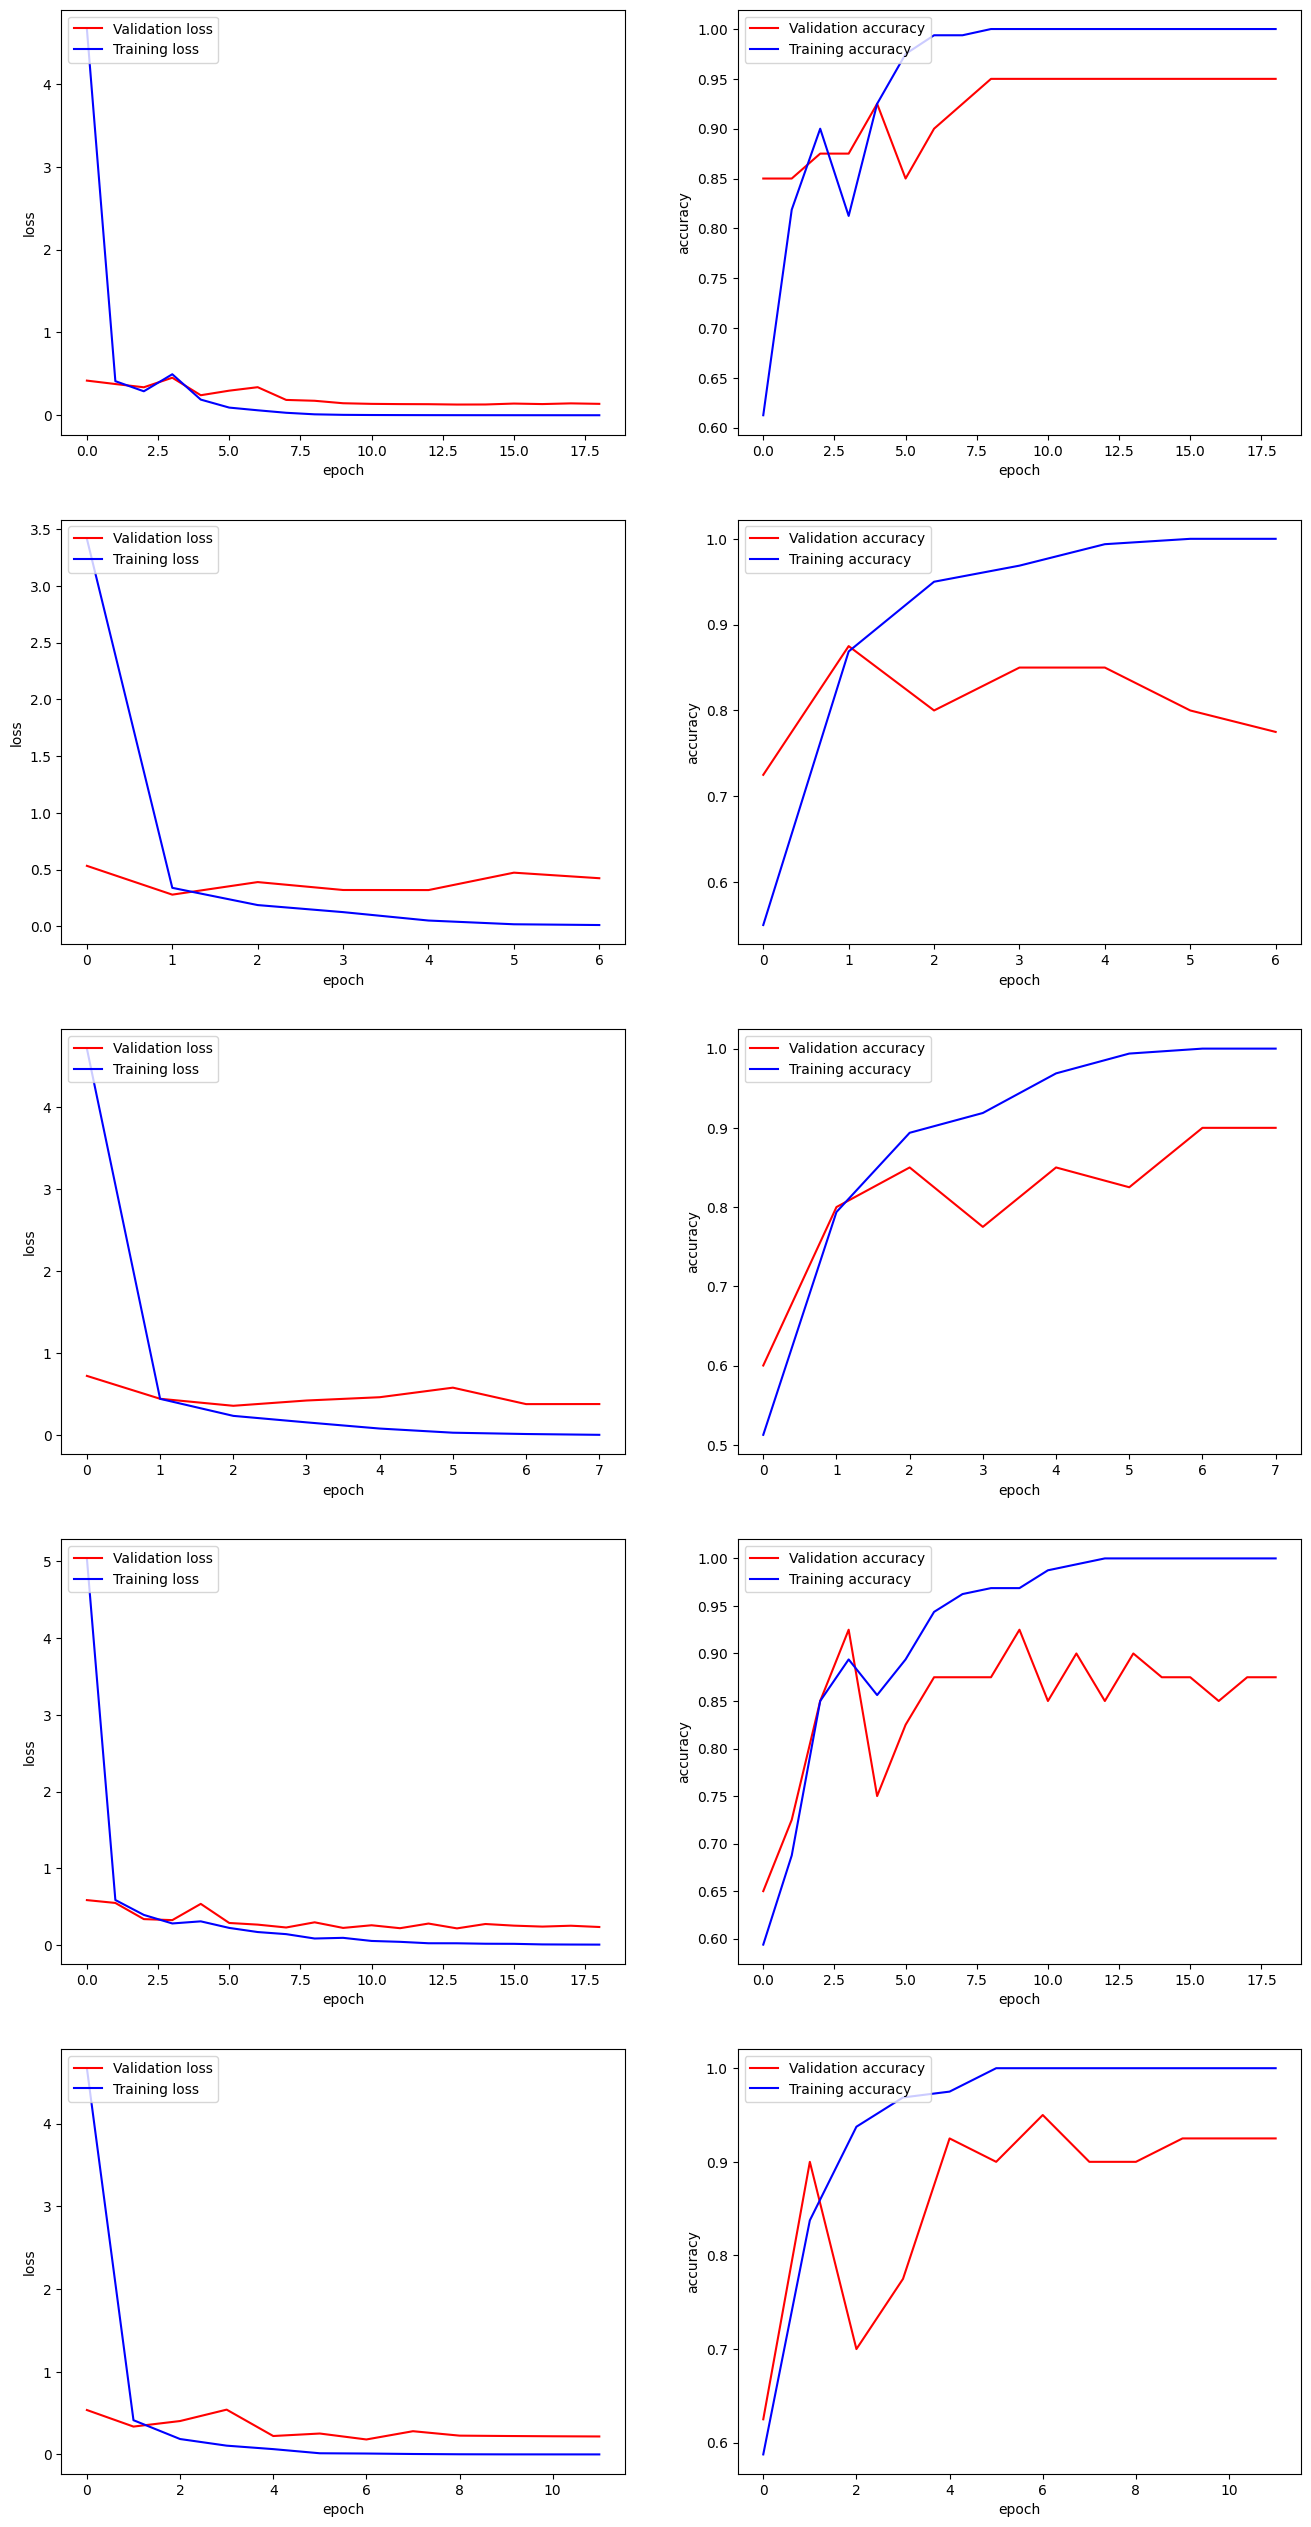

Accuracy: mean=88.500 std=6.042, n=5


([<keras.src.engine.sequential.Sequential at 0x7d5bdf34d630>,
 [0.949999988079071,
  0.7749999761581421,
  0.8999999761581421,
  0.875,
  0.925000011920929])

In [ ]:
my_classes = ['elephant','Elephant_negative_class']
my_path="Data_Project/Tiger-Fox-Elephant/"

X, y = clean_load_Xy(my_classes, my_path)
run_evaluation_opti(5,300,X, y, False, 0.001)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 128)     3584      
                                                                 
 Maxpooling2D_1 (MaxPooling  (None, 61, 61, 128)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dense (Dense)               (None, 100)               47628900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 47632585 (181.70 MB)
Trainable params: 47632585 (181.70 MB)
Non-trainable params: 0 (0.00 Byte)
____________

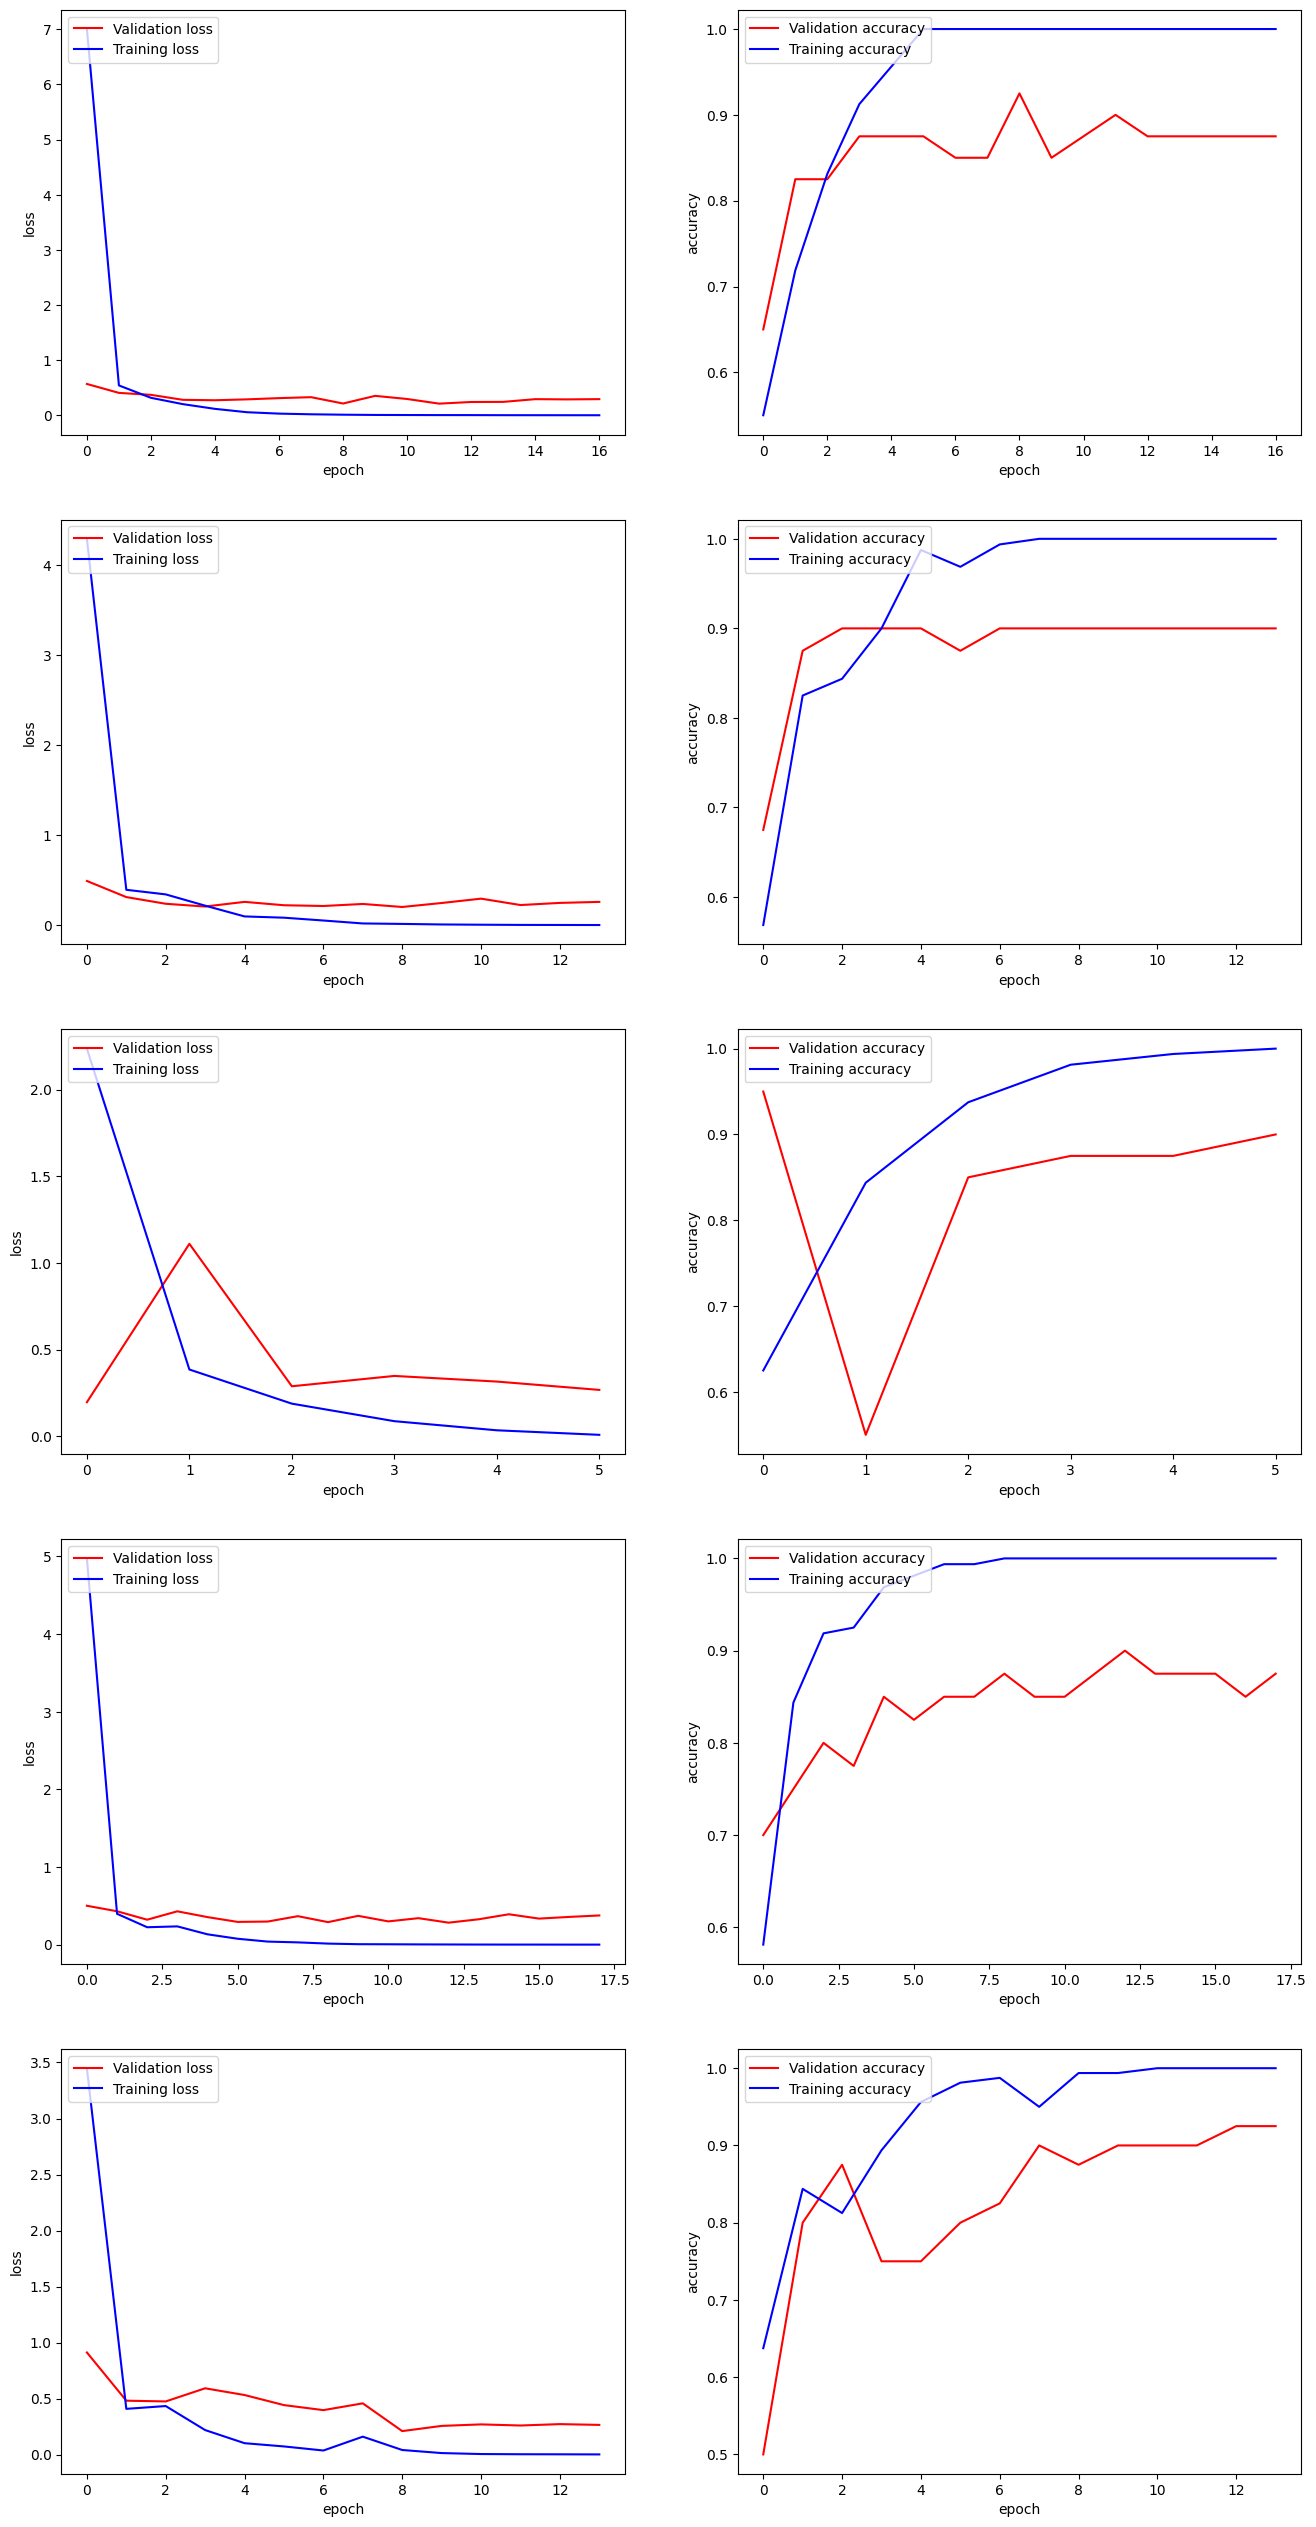

Accuracy: mean=89.500 std=1.871, n=5


([<keras.src.engine.sequential.Sequential at 0x7d5be6649000>,
 [0.875, 0.8999999761581421, 0.8999999761581421, 0.875, 0.925000011920929])

In [ ]:
my_classes = ['elephant','Elephant_negative_class']
my_path="Data_Project/Tiger-Fox-Elephant/"

X, y = clean_load_Xy(my_classes, my_path)
run_evaluation_opti(5,300,X, y, True, 0.001)

# Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

def generateData(repertoire_images, save_dir, nb_generate):

  datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

  for fichier in os.listdir(repertoire_images):
      if fichier.endswith('.jpg') or fichier.endswith('.png') or fichier.endswith('.jpeg'):
          chemin_image = os.path.join(repertoire_images, fichier)
          img = load_img(chemin_image)  # Charger l'image avec PIL
          x = img_to_array(img)  # Convertir en tableau Numpy
          x = x.reshape((1,) + x.shape)  # Ajuster la forme pour le générateur

          i = 0
          for batch in datagen.flow(x, batch_size=1,
                                    save_to_dir=save_dir,
                                    save_prefix='fox', save_format='jpg'):
              i += 1
              if i > nb_generate:
                  break  # Limiter le nombre d'images générées à 3 par image d'origine


In [ ]:
from keras.regularizers import l2

def evaluate_model_generator(model, dataX, dataY, n_folds=5, epochs=30, lr=0.001):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    #on veut enregistrer tous les modèles pour ensuite évaluer les données de test sur le meilleur
    liste_model = []

    # parcourir les splits du k-fold
    for train_ix, test_ix in kfold.split(dataX):
        #clone model
        model_kfold = tf.keras.models.clone_model(model)

        #compile model
        model_kfold.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
        print(model_kfold.summary())

        # selection des données
        X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

        #EarlyStopping pour éviter l'augmentation de la courbe validation loss
        earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=7)

        # fit du modele
        history = model_kfold.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1, callbacks=[earlyStop])
        # evaluate du modele
        loss, acc = model_kfold.evaluate(X_test, y_test, verbose=0)
        print('accuracy %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
        liste_model.append(model_kfold)

    return scores, histories, liste_model

def run_evaluation_generator(n_folds,epochs,X_train, y_train, bool_bn, lr):

    # define model
    model = define_model_generator()

    print(model.summary())

    scores, histories, liste_k_model = evaluate_model_generator(model, X_train, y_train, n_folds,epochs, lr)
    plot_curves_subplot(histories)
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

    return liste_k_model, scores

 #definition du premier modèle baseline
def define_model_generator():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=128, kernel_size=(3,3),
                     activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     name="Conv2D_1"))

    #model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           name="Maxpooling2D_1"))
    # flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    #model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.1)))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.1))
    #model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))


    return model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
import zipfile
with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    zip_ref.extractall("Data_Project_Generated")

--2023-12-13 22:37:00--  https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
Resolving www.lirmm.fr (www.lirmm.fr)... 193.49.104.251
Connecting to www.lirmm.fr (www.lirmm.fr)|193.49.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7605545 (7.3M) [application/zip]
Saving to: ‘Tiger-Fox-Elephant.zip.2’

Tiger-Fox-Elephant. 100%[===================>]   7.25M  7.61MB/s    in 1.0s    

2023-12-13 22:37:02 (7.61 MB/s) - ‘Tiger-Fox-Elephant.zip.2’ saved [7605545/7605545]



In [ ]:


repertoire_images = '/content/Data_Project/Tiger-Fox-Elephant/Elephant_negative_class'
save_dir = '/content/Data_Project_Generated/Tiger-Fox-Elephant/Elephant_negative_class'

repertoire_images2 = '/content/Data_Project/Tiger-Fox-Elephant/elephant'
save_dir2 = '/content/Data_Project_Generated/Tiger-Fox-Elephant/elephant'

#repertoire_images2 = '/content/gdrive/MyDrive/Colab Notebooks/ML2/Data_Project/Tiger-Fox-Elephant/new_fox'
#save_dir2 = '/content/gdrive/MyDrive/Colab Notebooks/ML2/Data_Project/Tiger-Fox-Elephant/new_fox_generated'

generateData(repertoire_images, save_dir, 10)
generateData(repertoire_images2, save_dir2, 10)



In [ ]:
my_classes = ['elephant','Elephant_negative_class']
my_path="Data_Project_Generated/Tiger-Fox-Elephant/"
X, y = clean_load_Xy(my_classes, my_path)

In [ ]:
#résultats avec filter = 128
run_evaluation_generator(5,150,X, y, True, 0.001)
print(len(X))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 128)     3584      
                                                                 
 Maxpooling2D_1 (MaxPooling  (None, 61, 61, 128)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               47628900  
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 47632585 (181.70 MB)
Trainable params: 47632585 (181.70 MB)
Non-trainable params: 0 (0.00 Byte)
__________

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 122, 122, 32)      896       
                                                                 
 Maxpooling2D_1 (MaxPooling  (None, 61, 61, 32)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               11907300  
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11908297 (45.43 MB)
Trainable params: 11908297 (45.43 MB)
Non-trainable params: 0 (0.00 Byte)
____________

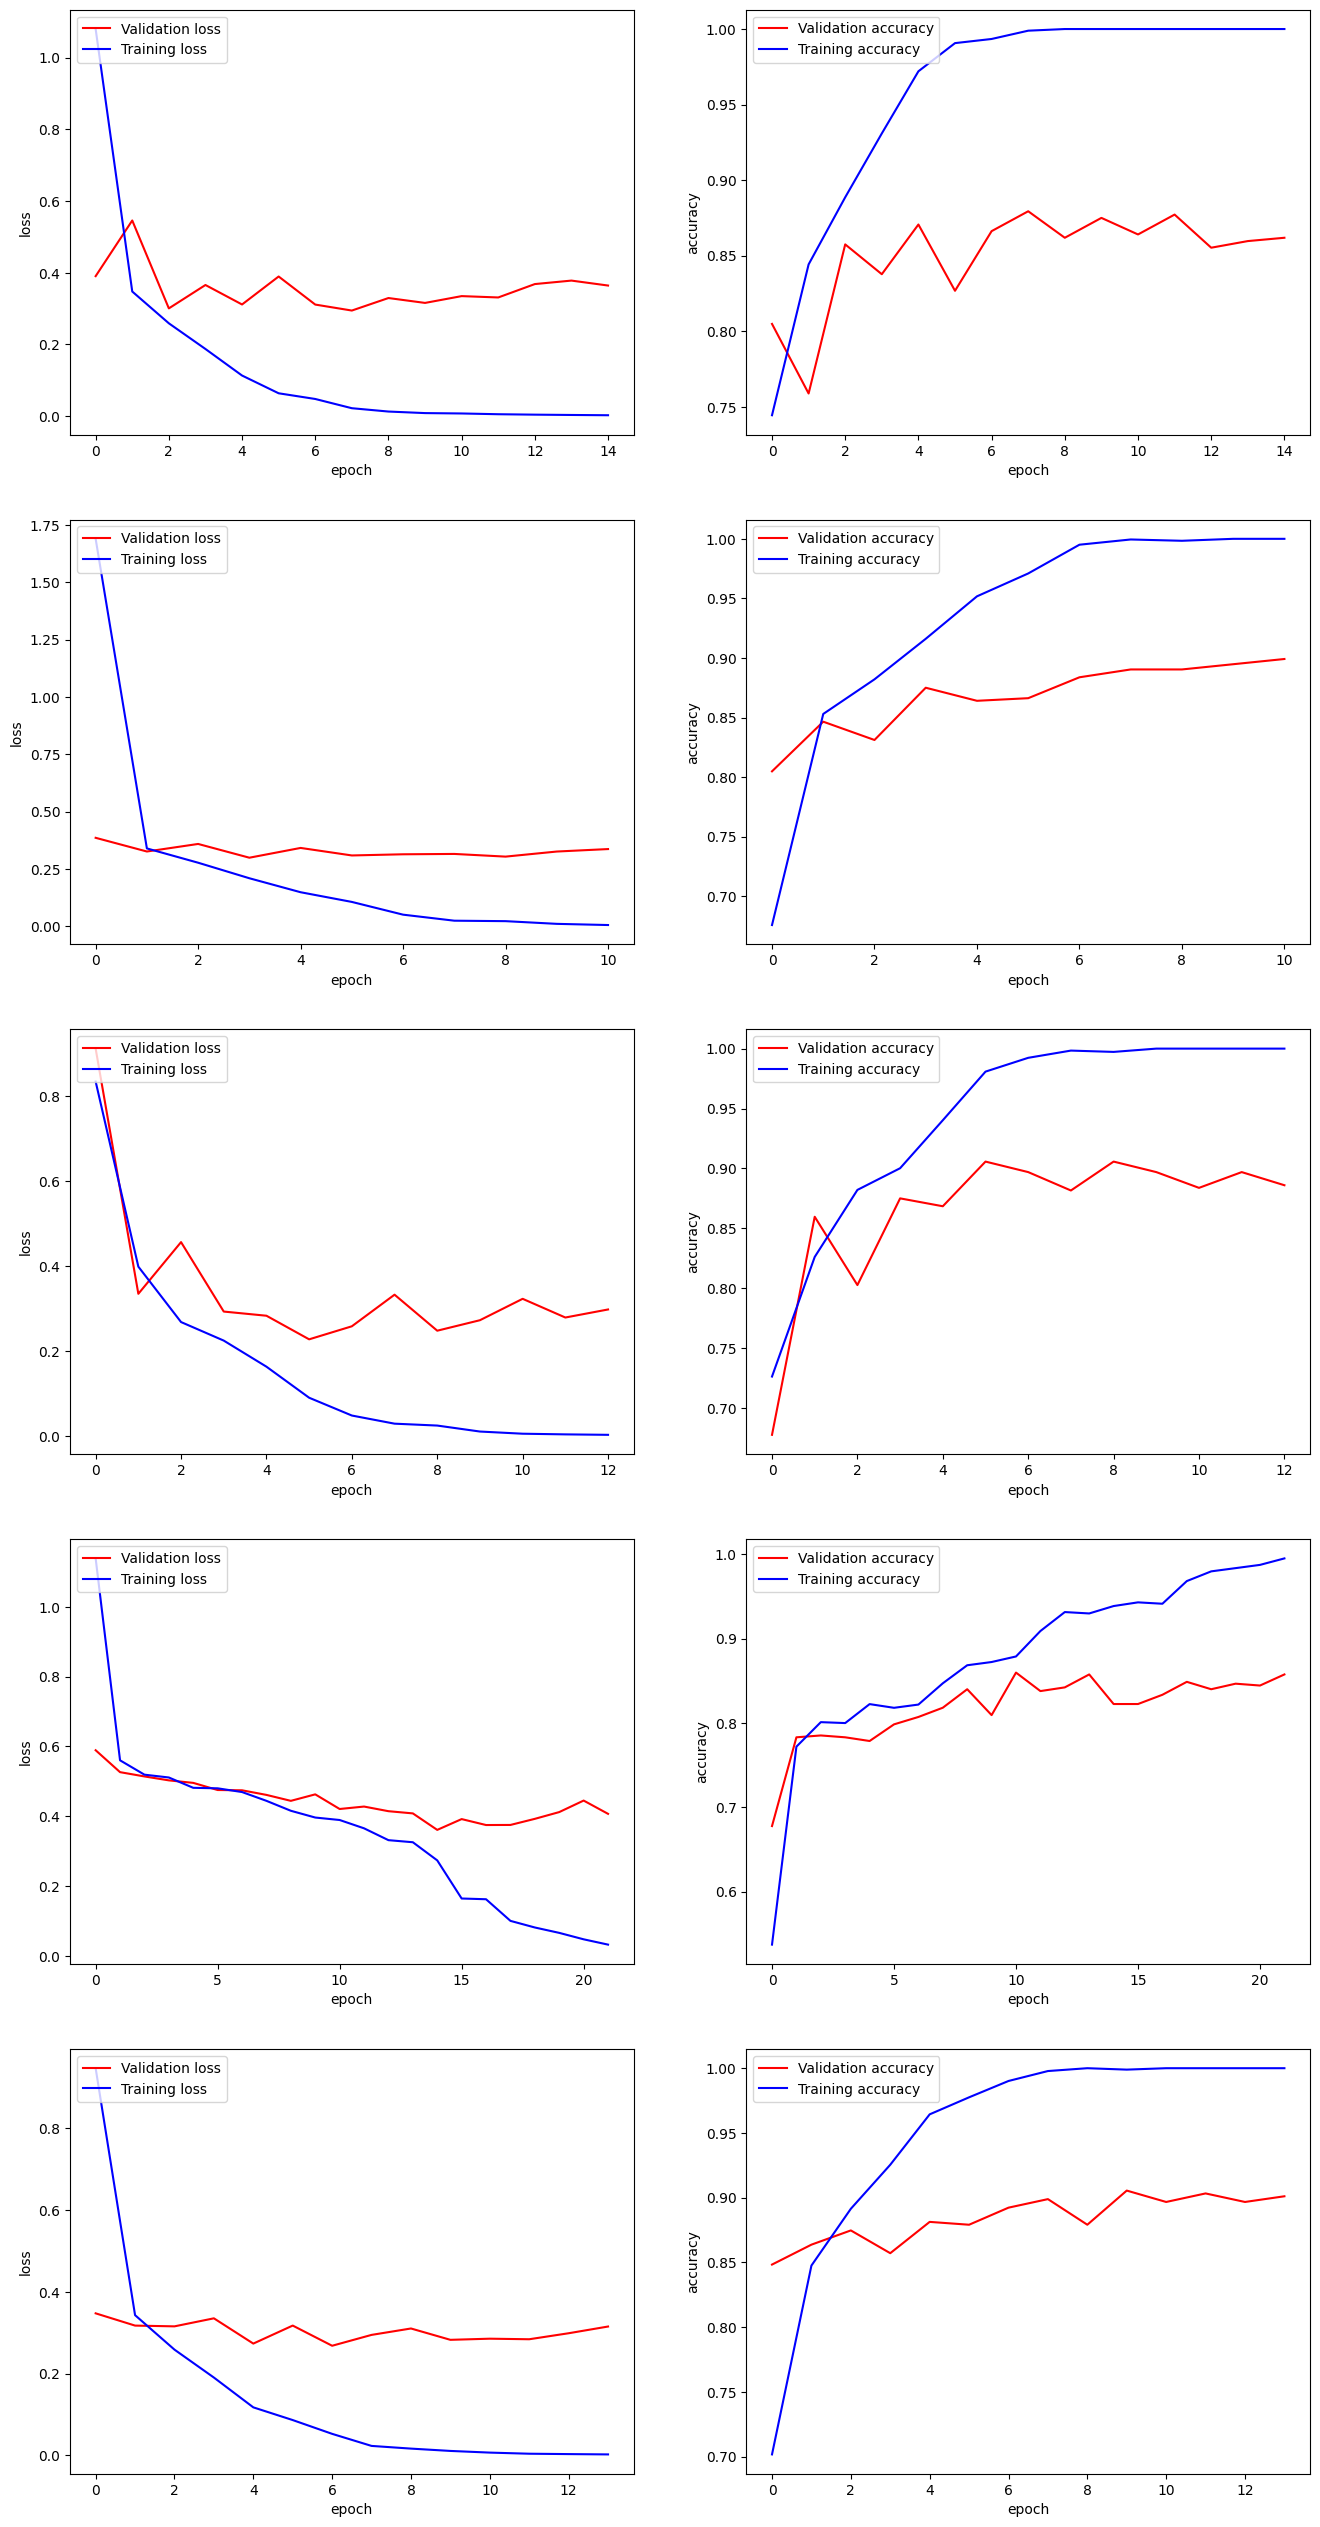

Accuracy: mean=88.110 std=1.832, n=5
2279


In [ ]:
#Regarder resultats avec données générées et filter 32

run_evaluation_generator(5,150,X, y, True, 0.001)
print(len(X))

# Transfer Learning

In [ ]:
#my_path="Data_Project/Tiger-Fox-Elephant/"
#my_classes=['elephant','Elephant_negative_class']
#X,y=create_X_y (my_path,my_classes)

my_classes = ['elephant','Elephant_negative_class']
my_path="Data_Project_Generated/Tiger-Fox-Elephant/"
X, y = clean_load_Xy(my_classes, my_path)

X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1024

# Evaluation avec un k-fold
def evaluate_model_tl(dataX, dataY, base_model, n_folds=5, epochs=30, batch_size=32):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # parcourir les splits du k-fold
  for train_ix, test_ix in kfold.split(dataX):

    X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

    train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(batch_size)
    test_dataset = test_dataset.batch(batch_size)

    image_batch, label_batch = next(iter(train_dataset))
    feature_batch = base_model(image_batch)

    model = define_model_tl(base_model, feature_batch)

    # fit du modele
    history = model.fit(train_dataset,epochs=epochs,validation_data=test_dataset)

    # evaluate du modele
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    print('accuracy %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
    plot_curves_subplot(histories)
  return scores, histories

# definition du premier modèle baseline
def define_model_tl(base_model, feature_batch):
  base_model.trainable = False

  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  feature_batch_average = global_average_layer(feature_batch)
  print(feature_batch_average.shape)

  prediction_layer = tf.keras.layers.Dense(1)
  prediction_batch = prediction_layer(feature_batch_average)
  print(prediction_batch.shape)

  inputs = tf.keras.Input(shape=IMG_SHAPE)
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = base_model(x, training=False)
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  outputs = prediction_layer(x)
  model = tf.keras.Model(inputs, outputs)

  base_learning_rate = 0.01
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

  return model


# elle lance n-folds fois l'évaluation et affiche les courbes et résultats
def run_evaluation_tl(X_learn, y_learn, n_folds, epochs, batch_size, base_model):
	# evaluate model
	scores, histories = evaluate_model_tl(X_learn, y_learn, base_model, n_folds, epochs, batch_size)
	plot_curves(histories)
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))


(32, 1280)
(32, 1)
Epoch 1/300
35/35 [==============================] - 5s 52ms/step - loss: 0.6979 - accuracy: 0.4982 - val_loss: 0.6857 - val_accuracy: 0.5255
Epoch 2/300
35/35 [==============================] - 1s 25ms/step - loss: 0.6868 - accuracy: 0.5155 - val_loss: 0.6795 - val_accuracy: 0.5255
Epoch 3/300
35/35 [==============================] - 1s 26ms/step - loss: 0.6897 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5730
Epoch 4/300
35/35 [==============================] - 1s 26ms/step - loss: 0.6772 - accuracy: 0.5100 - val_loss: 0.6670 - val_accuracy: 0.5328
Epoch 5/300
35/35 [==============================] - 1s 26ms/step - loss: 0.6690 - accuracy: 0.5447 - val_loss: 0.6613 - val_accuracy: 0.5328
Epoch 6/300
35/35 [==============================] - 1s 26ms/step - loss: 0.6774 - accuracy: 0.5201 - val_loss: 0.6608 - val_accuracy: 0.5292
Epoch 7/300
35/35 [==============================] - 1s 33ms/step - loss: 0.6752 - accuracy: 0.5137 - val_loss: 0.6876 - val_accu

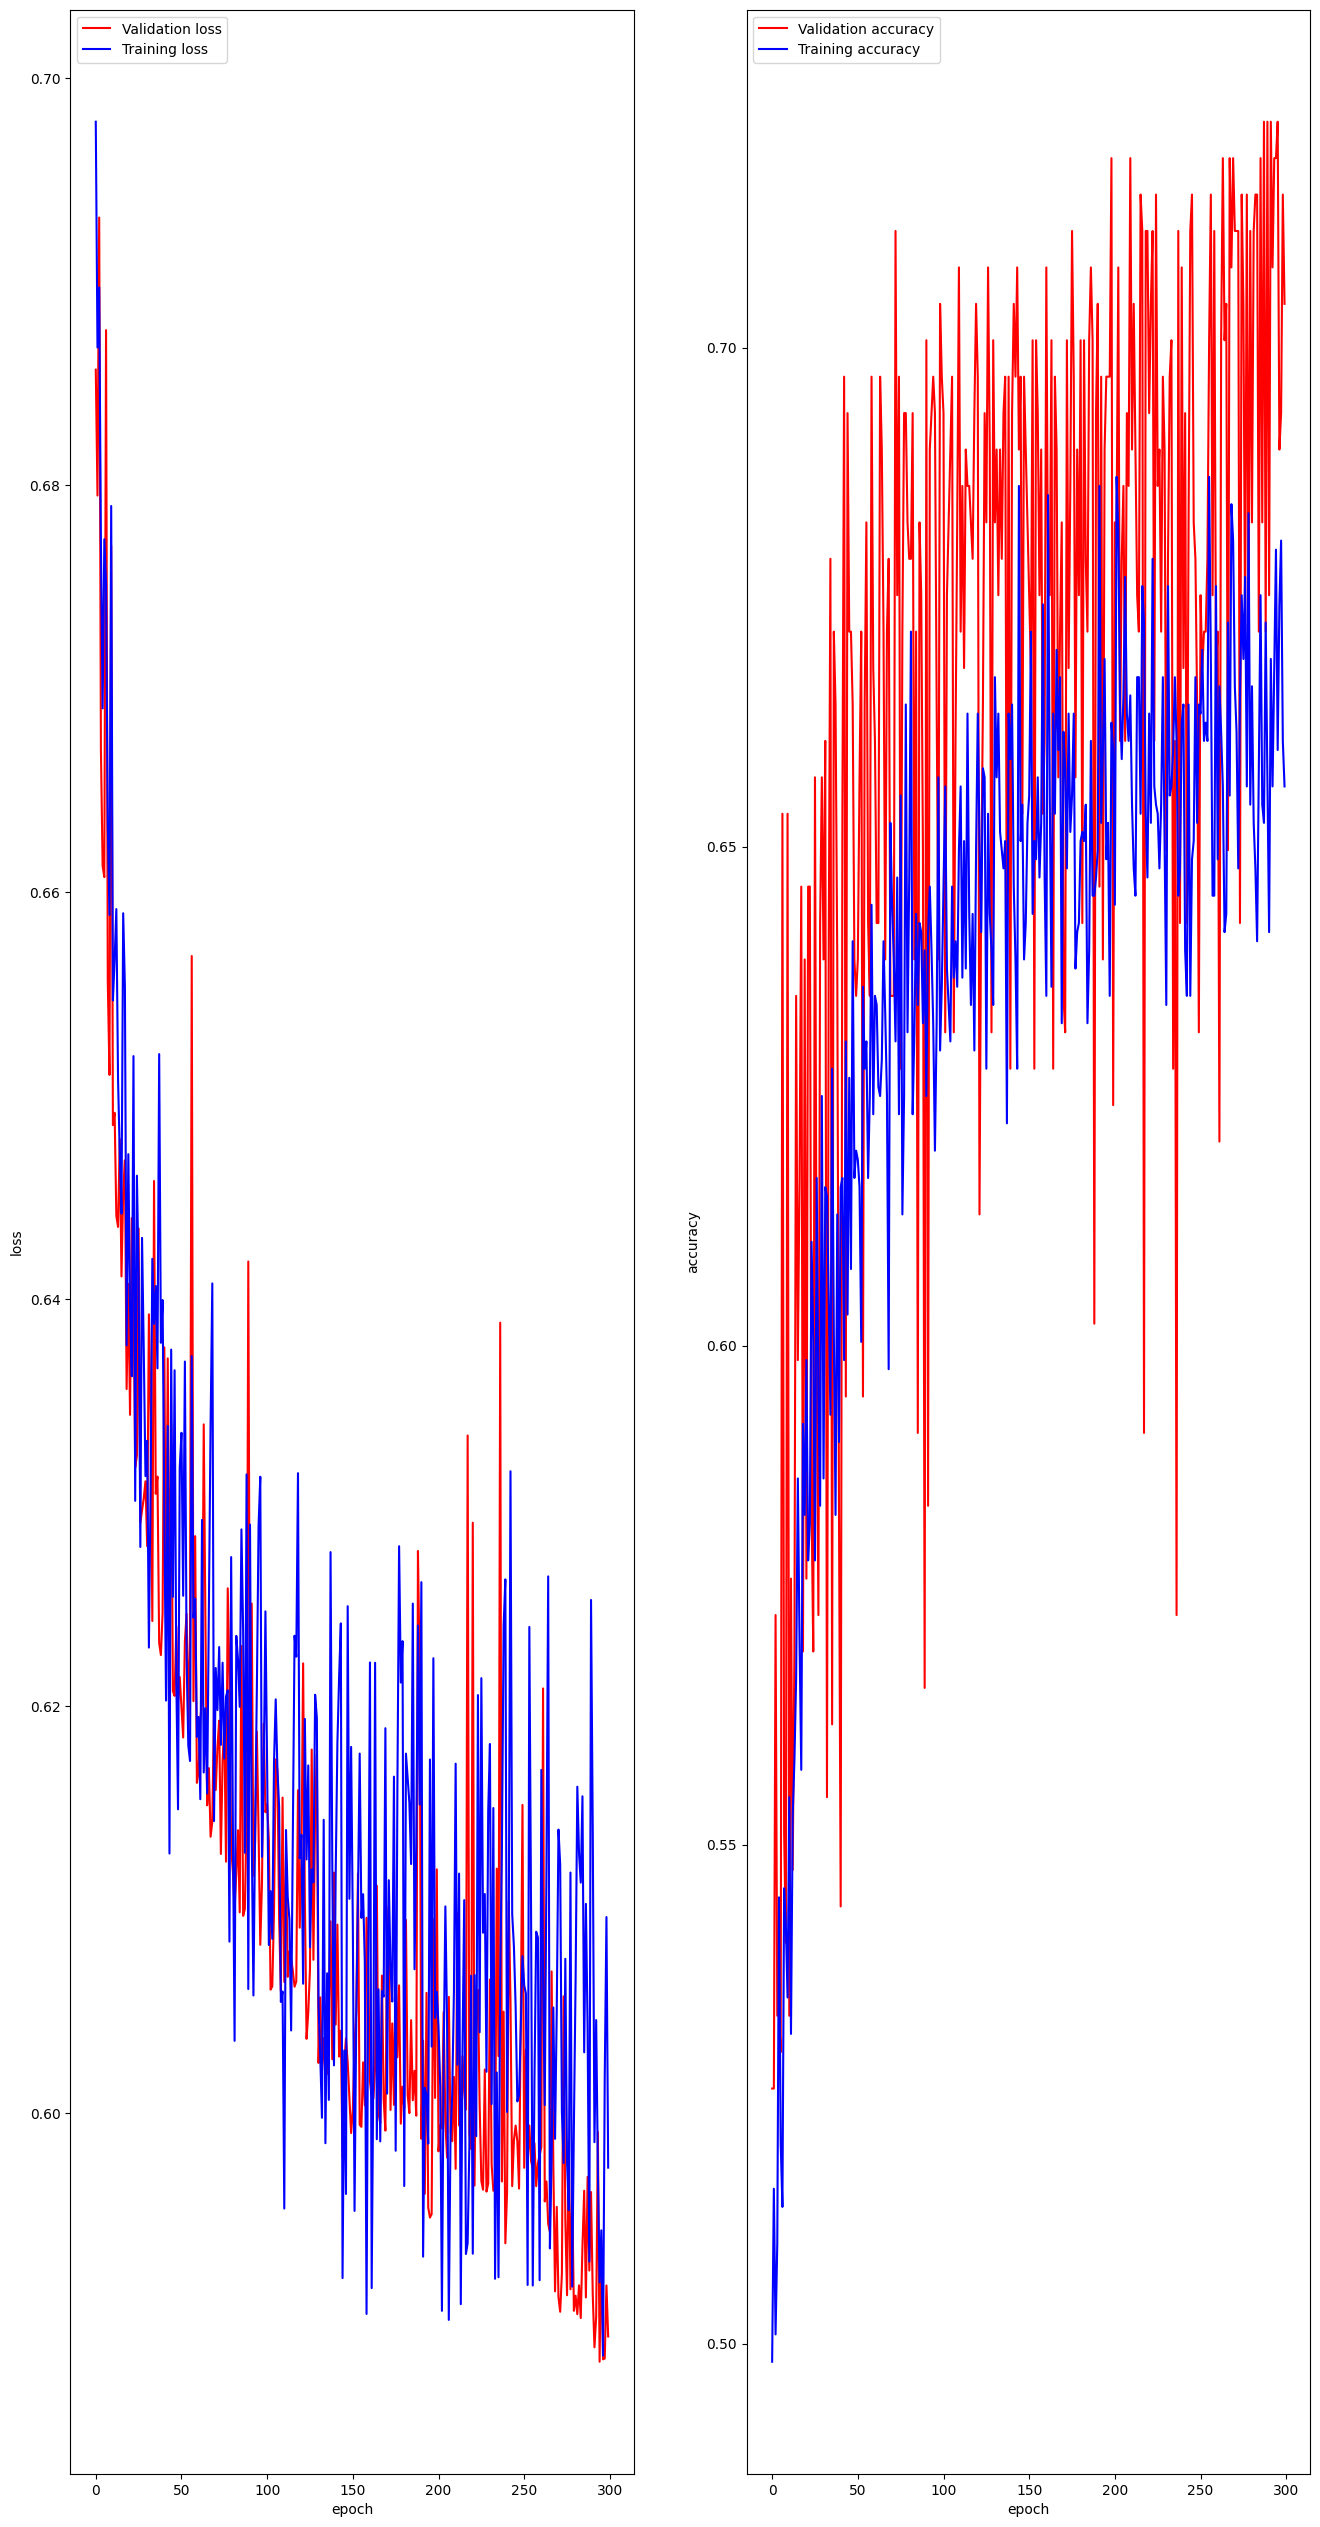

(32, 1280)
(32, 1)
Epoch 1/300
35/35 [==============================] - 5s 66ms/step - loss: 0.6991 - accuracy: 0.5064 - val_loss: 0.6868 - val_accuracy: 0.4781
Epoch 2/300
35/35 [==============================] - 1s 32ms/step - loss: 0.6811 - accuracy: 0.5173 - val_loss: 0.6808 - val_accuracy: 0.4781
Epoch 3/300
35/35 [==============================] - 1s 35ms/step - loss: 0.6775 - accuracy: 0.5137 - val_loss: 0.6642 - val_accuracy: 0.4818
Epoch 4/300
35/35 [==============================] - 1s 27ms/step - loss: 0.6782 - accuracy: 0.5192 - val_loss: 0.6586 - val_accuracy: 0.4854
Epoch 5/300
35/35 [==============================] - 1s 26ms/step - loss: 0.6736 - accuracy: 0.5429 - val_loss: 0.6579 - val_accuracy: 0.4818
Epoch 6/300
35/35 [==============================] - 1s 27ms/step - loss: 0.6711 - accuracy: 0.5210 - val_loss: 0.6471 - val_accuracy: 0.4927
Epoch 7/300
35/35 [==============================] - 1s 26ms/step - loss: 0.6612 - accuracy: 0.5347 - val_loss: 0.6417 - val_accu

KeyboardInterrupt: ignored

In [ ]:
#MobileNetV2
IMG_SIZE = 124
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
  tf.keras.layers.RandomZoom(0.2, fill_mode="nearest")
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

n_folds=5
epochs=300
batch_size=32

run_evaluation_tl(X_copy, y_copy, n_folds, epochs, batch_size, model)

94765736/94765736 [==============================] - 0s 0us/step
(32, 2048)
(32, 1)
Epoch 1/300
5/5 [==============================] - 6s 437ms/step - loss: 0.9087 - accuracy: 0.5063 - val_loss: 0.8675 - val_accuracy: 0.5250
Epoch 2/300
5/5 [==============================] - 0s 89ms/step - loss: 0.6372 - accuracy: 0.6687 - val_loss: 0.5224 - val_accuracy: 0.6500
Epoch 3/300
5/5 [==============================] - 0s 89ms/step - loss: 0.5353 - accuracy: 0.7375 - val_loss: 0.4141 - val_accuracy: 0.7000
Epoch 4/300
5/5 [==============================] - 0s 86ms/step - loss: 0.3449 - accuracy: 0.8125 - val_loss: 0.3702 - val_accuracy: 0.7750
Epoch 5/300
5/5 [==============================] - 0s 88ms/step - loss: 0.3580 - accuracy: 0.8313 - val_loss: 0.3101 - val_accuracy: 0.8250
Epoch 6/300
5/5 [==============================] - 0s 87ms/step - loss: 0.2751 - accuracy: 0.8687 - val_loss: 0.2694 - val_accuracy: 0.8750
Epoch 7/300
5/5 [==============================] - 0s 87ms/step - loss: 0.2

2/2 [==============================] - 1s 44ms/step
accuracy 90.000


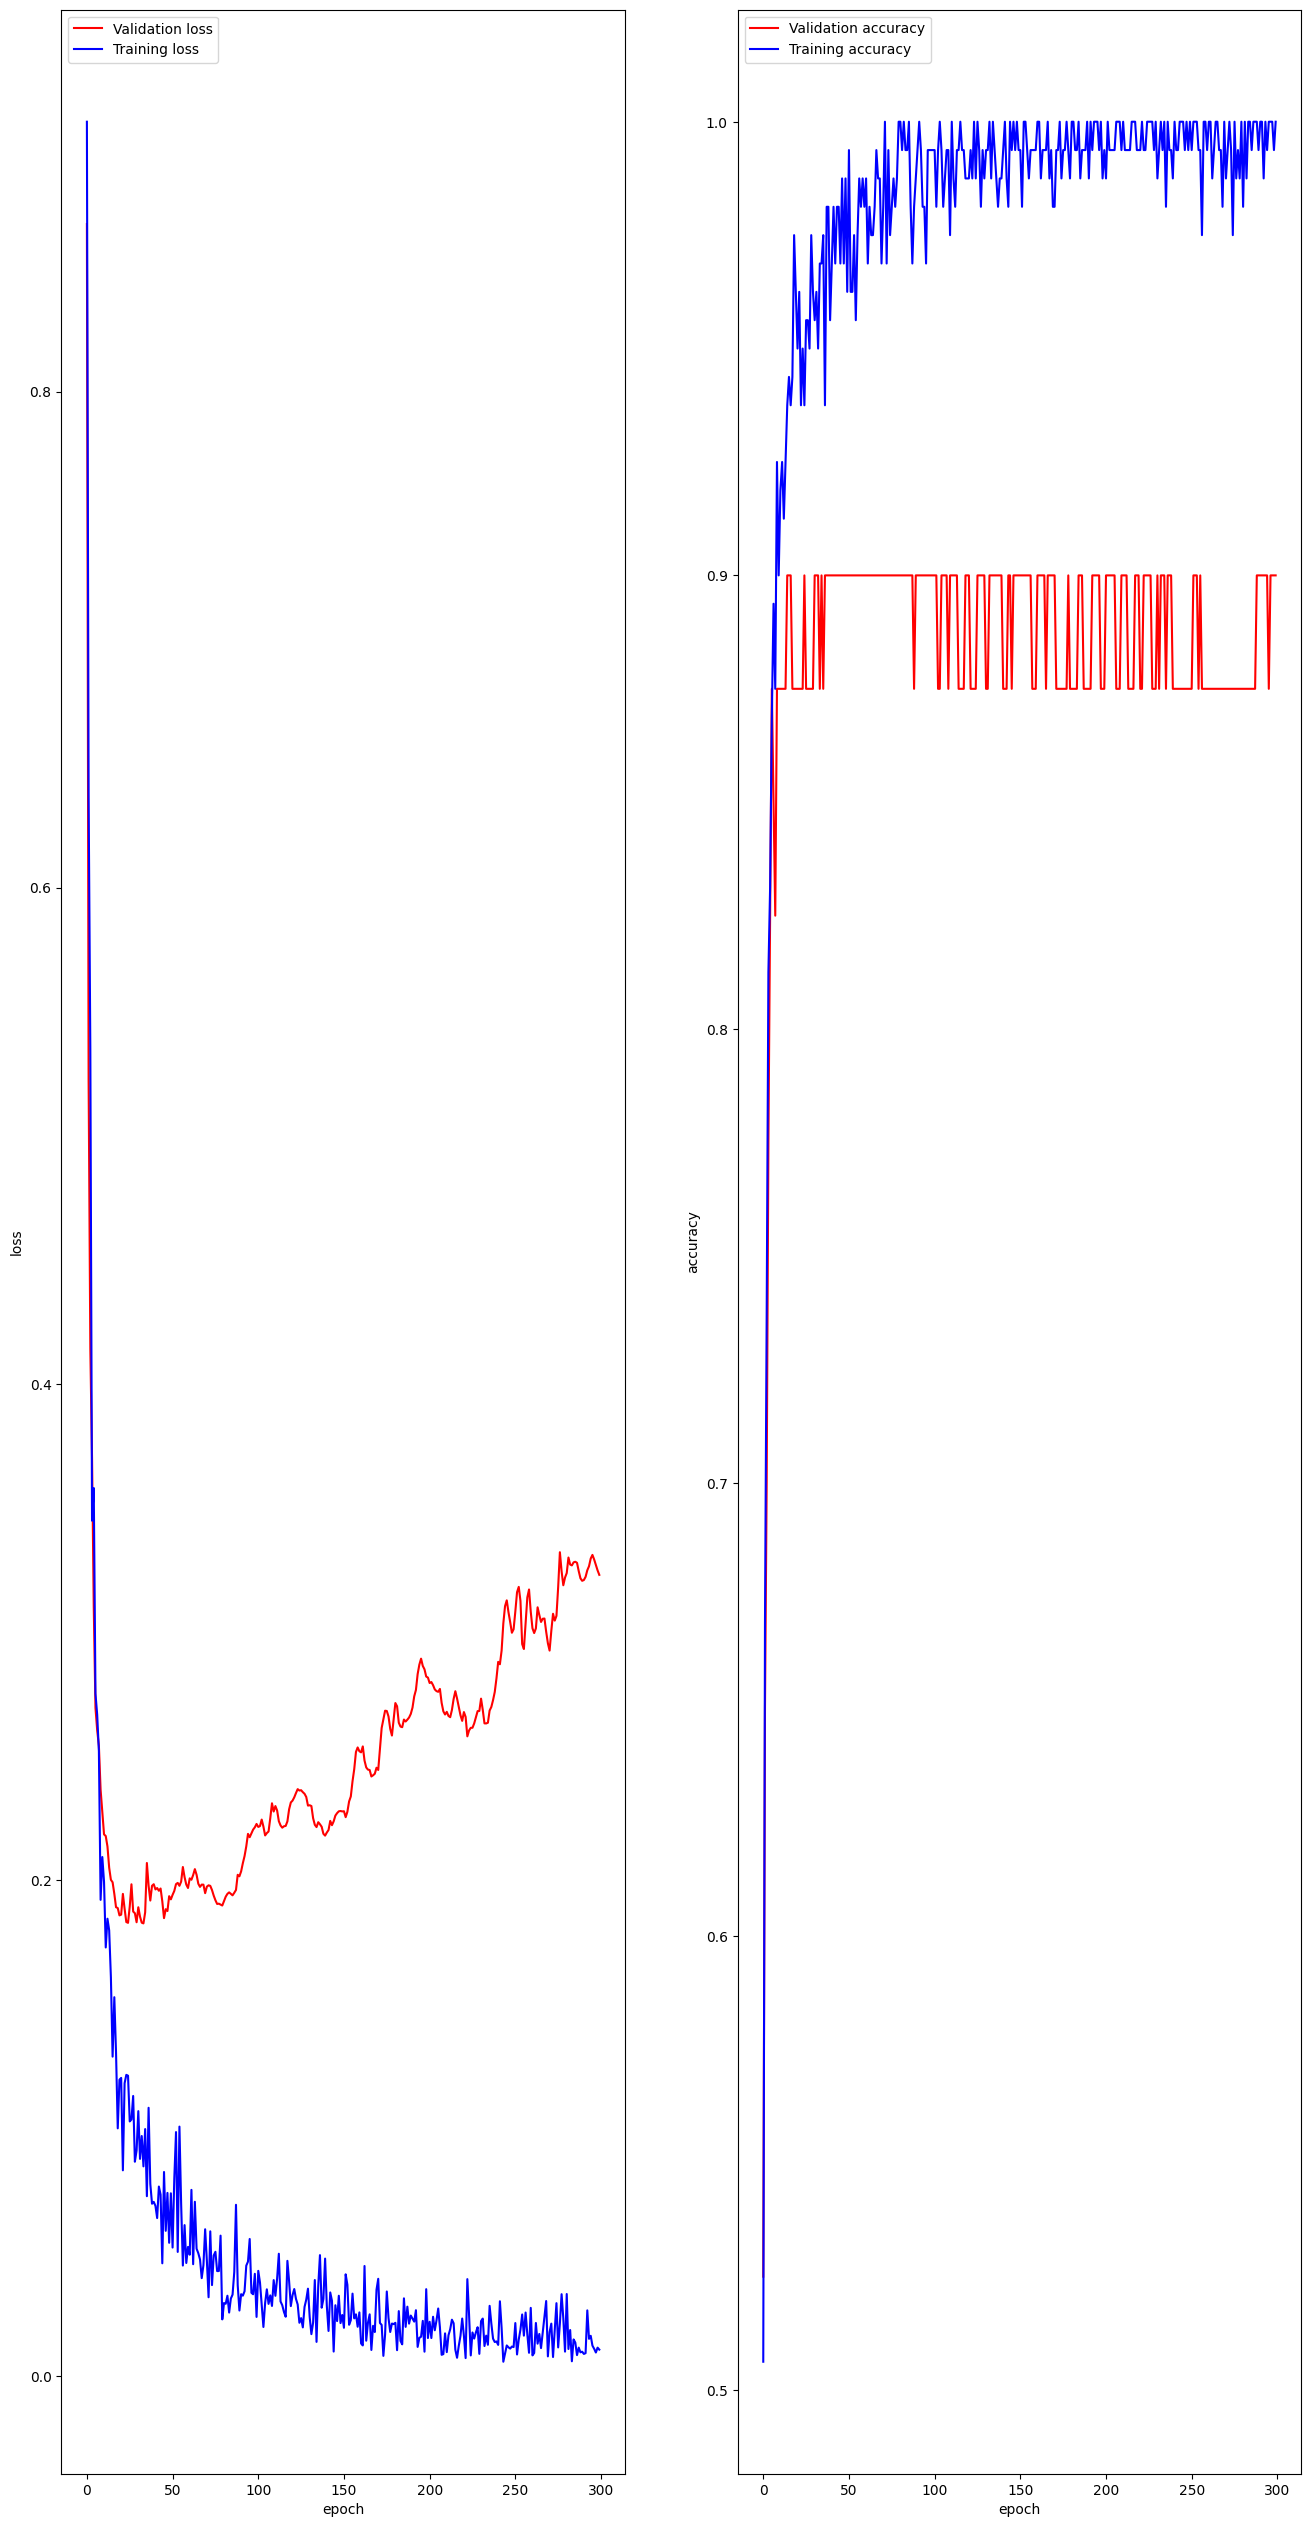

(32, 2048)
(32, 1)
Epoch 1/300
5/5 [==============================] - 8s 405ms/step - loss: 0.7176 - accuracy: 0.6187 - val_loss: 0.4778 - val_accuracy: 0.8250
Epoch 2/300
5/5 [==============================] - 0s 91ms/step - loss: 0.5124 - accuracy: 0.7500 - val_loss: 0.3460 - val_accuracy: 0.8500
Epoch 3/300
5/5 [==============================] - 0s 90ms/step - loss: 0.4673 - accuracy: 0.7688 - val_loss: 0.2593 - val_accuracy: 0.8750
Epoch 4/300
5/5 [==============================] - 0s 89ms/step - loss: 0.4373 - accuracy: 0.7812 - val_loss: 0.2127 - val_accuracy: 0.9000
Epoch 5/300
5/5 [==============================] - 0s 90ms/step - loss: 0.3576 - accuracy: 0.8375 - val_loss: 0.1798 - val_accuracy: 0.9000
Epoch 6/300
5/5 [==============================] - 0s 91ms/step - loss: 0.2745 - accuracy: 0.8875 - val_loss: 0.1550 - val_accuracy: 0.9250
Epoch 7/300
5/5 [==============================] - 0s 93ms/step - loss: 0.2547 - accuracy: 0.8625 - val_loss: 0.1387 - val_accuracy: 0.9250


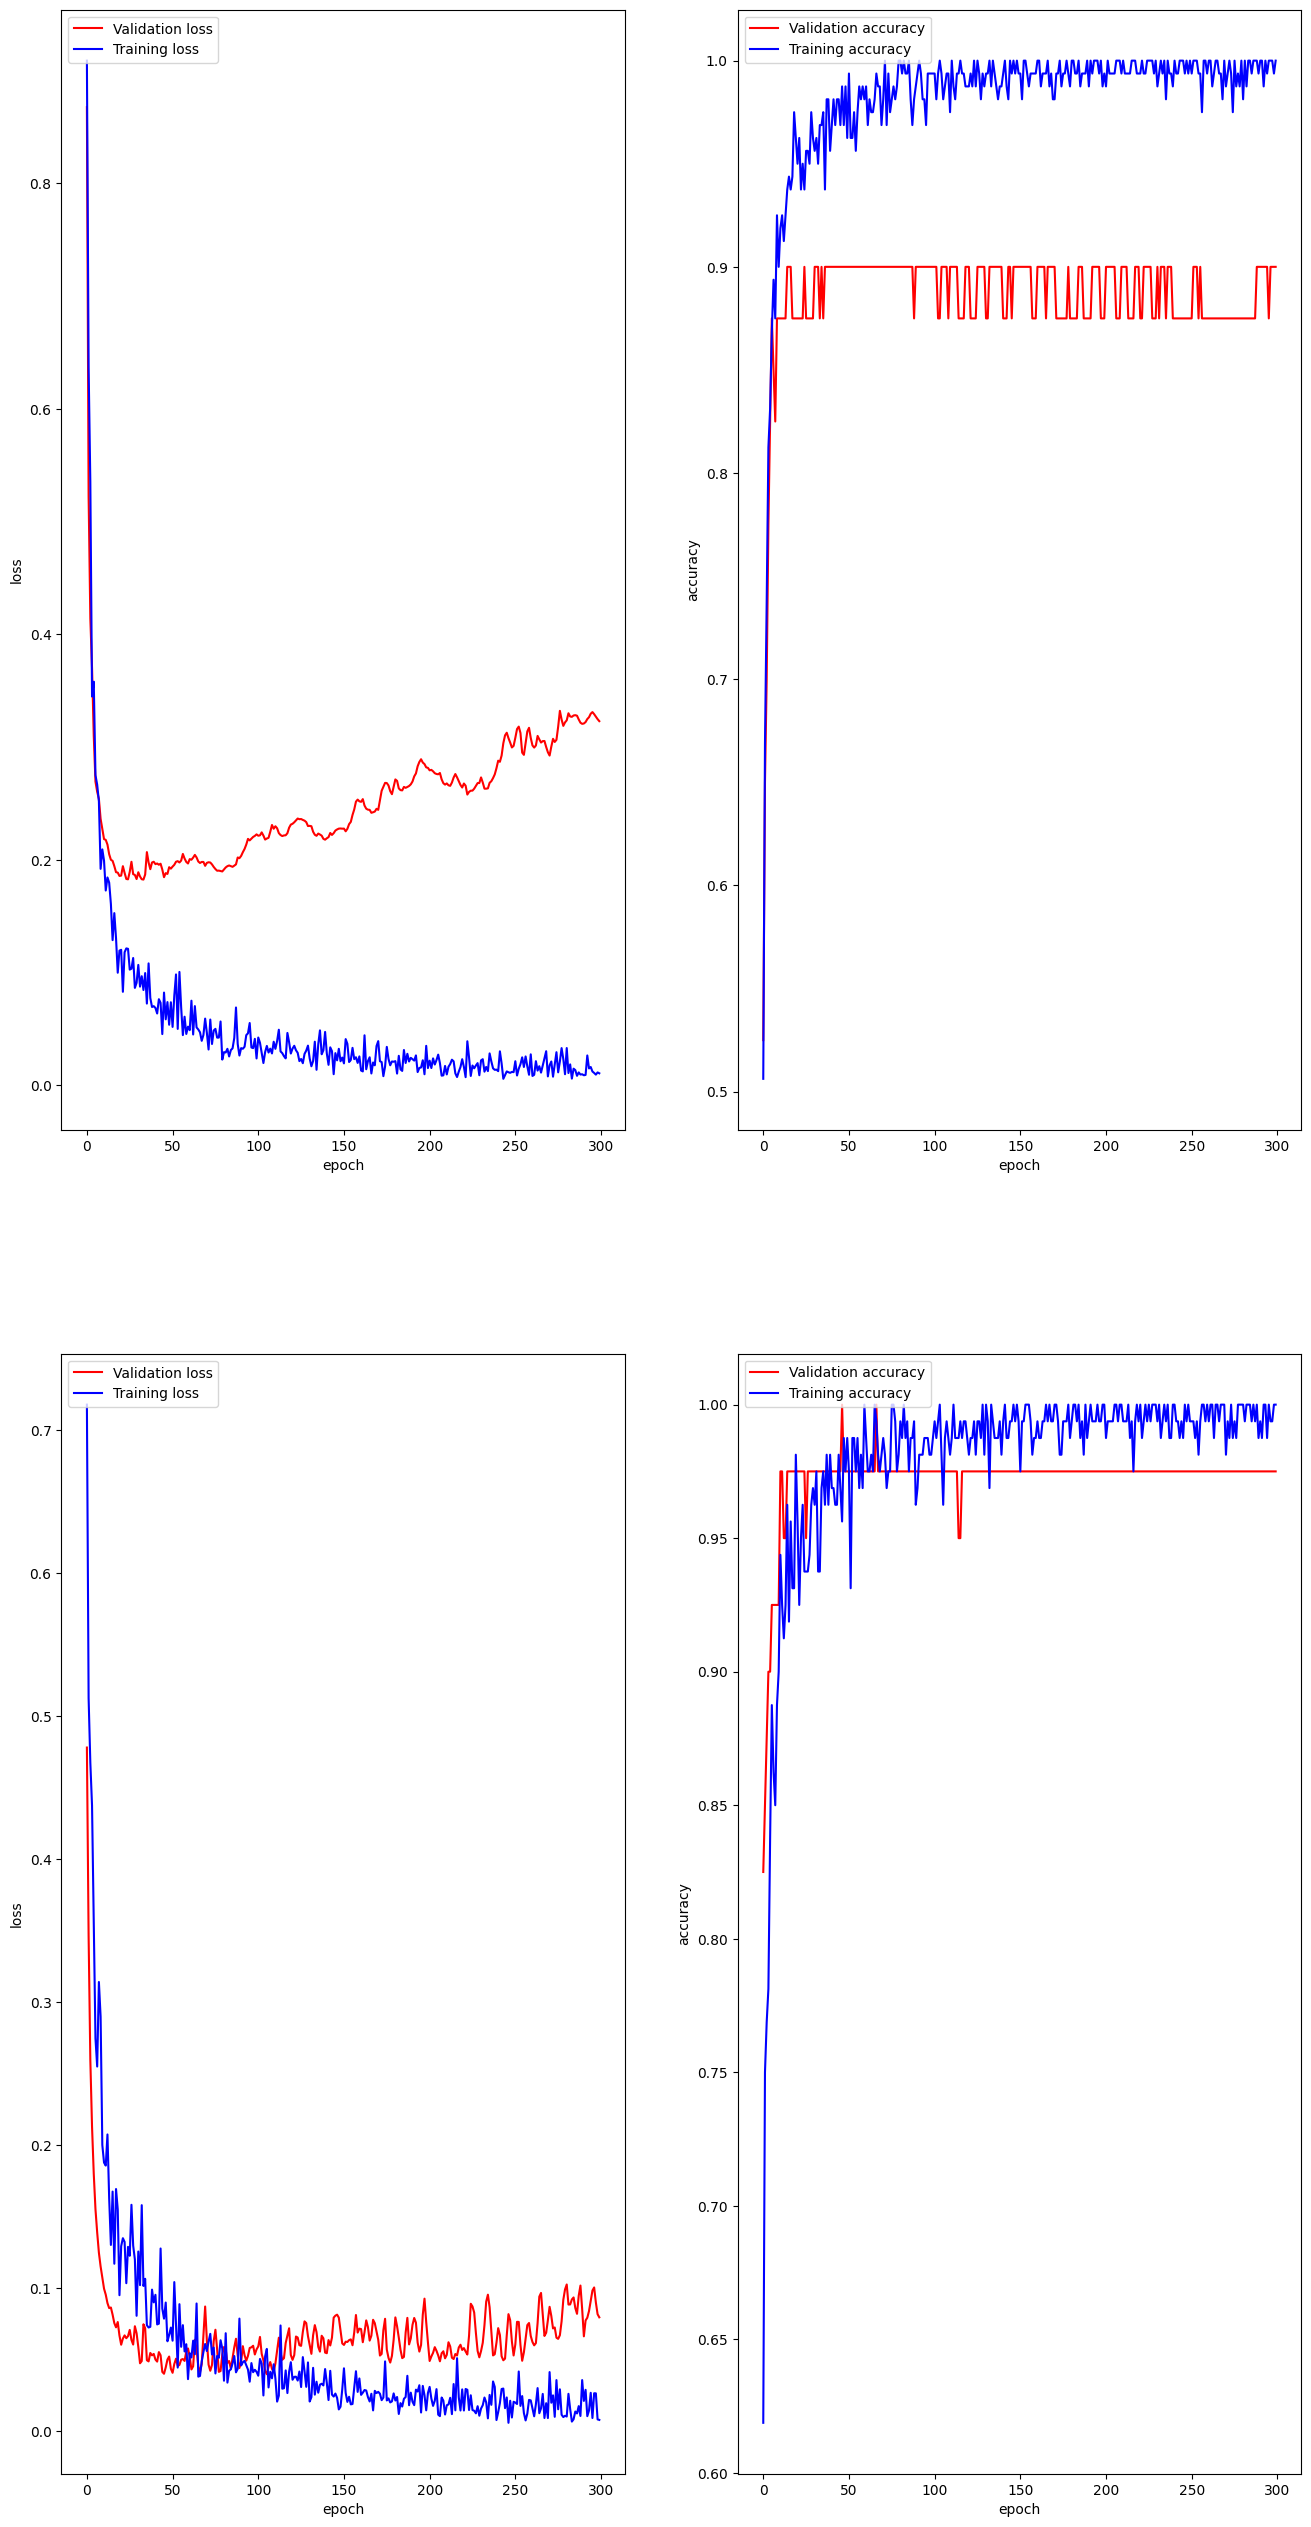

(32, 2048)
(32, 1)
Epoch 1/300
5/5 [==============================] - 7s 559ms/step - loss: 1.0842 - accuracy: 0.4812 - val_loss: 0.8758 - val_accuracy: 0.5750
Epoch 2/300
5/5 [==============================] - 1s 104ms/step - loss: 0.7275 - accuracy: 0.6250 - val_loss: 0.6181 - val_accuracy: 0.6500
Epoch 3/300
5/5 [==============================] - 0s 89ms/step - loss: 0.5622 - accuracy: 0.6750 - val_loss: 0.4165 - val_accuracy: 0.8500
Epoch 4/300
5/5 [==============================] - 0s 92ms/step - loss: 0.4663 - accuracy: 0.7375 - val_loss: 0.3587 - val_accuracy: 0.8750
Epoch 5/300
5/5 [==============================] - 0s 91ms/step - loss: 0.3529 - accuracy: 0.8438 - val_loss: 0.3187 - val_accuracy: 0.8750
Epoch 6/300
5/5 [==============================] - 0s 94ms/step - loss: 0.2696 - accuracy: 0.8750 - val_loss: 0.2151 - val_accuracy: 0.9750
Epoch 7/300
5/5 [==============================] - 0s 90ms/step - loss: 0.2383 - accuracy: 0.8813 - val_loss: 0.2062 - val_accuracy: 0.9500

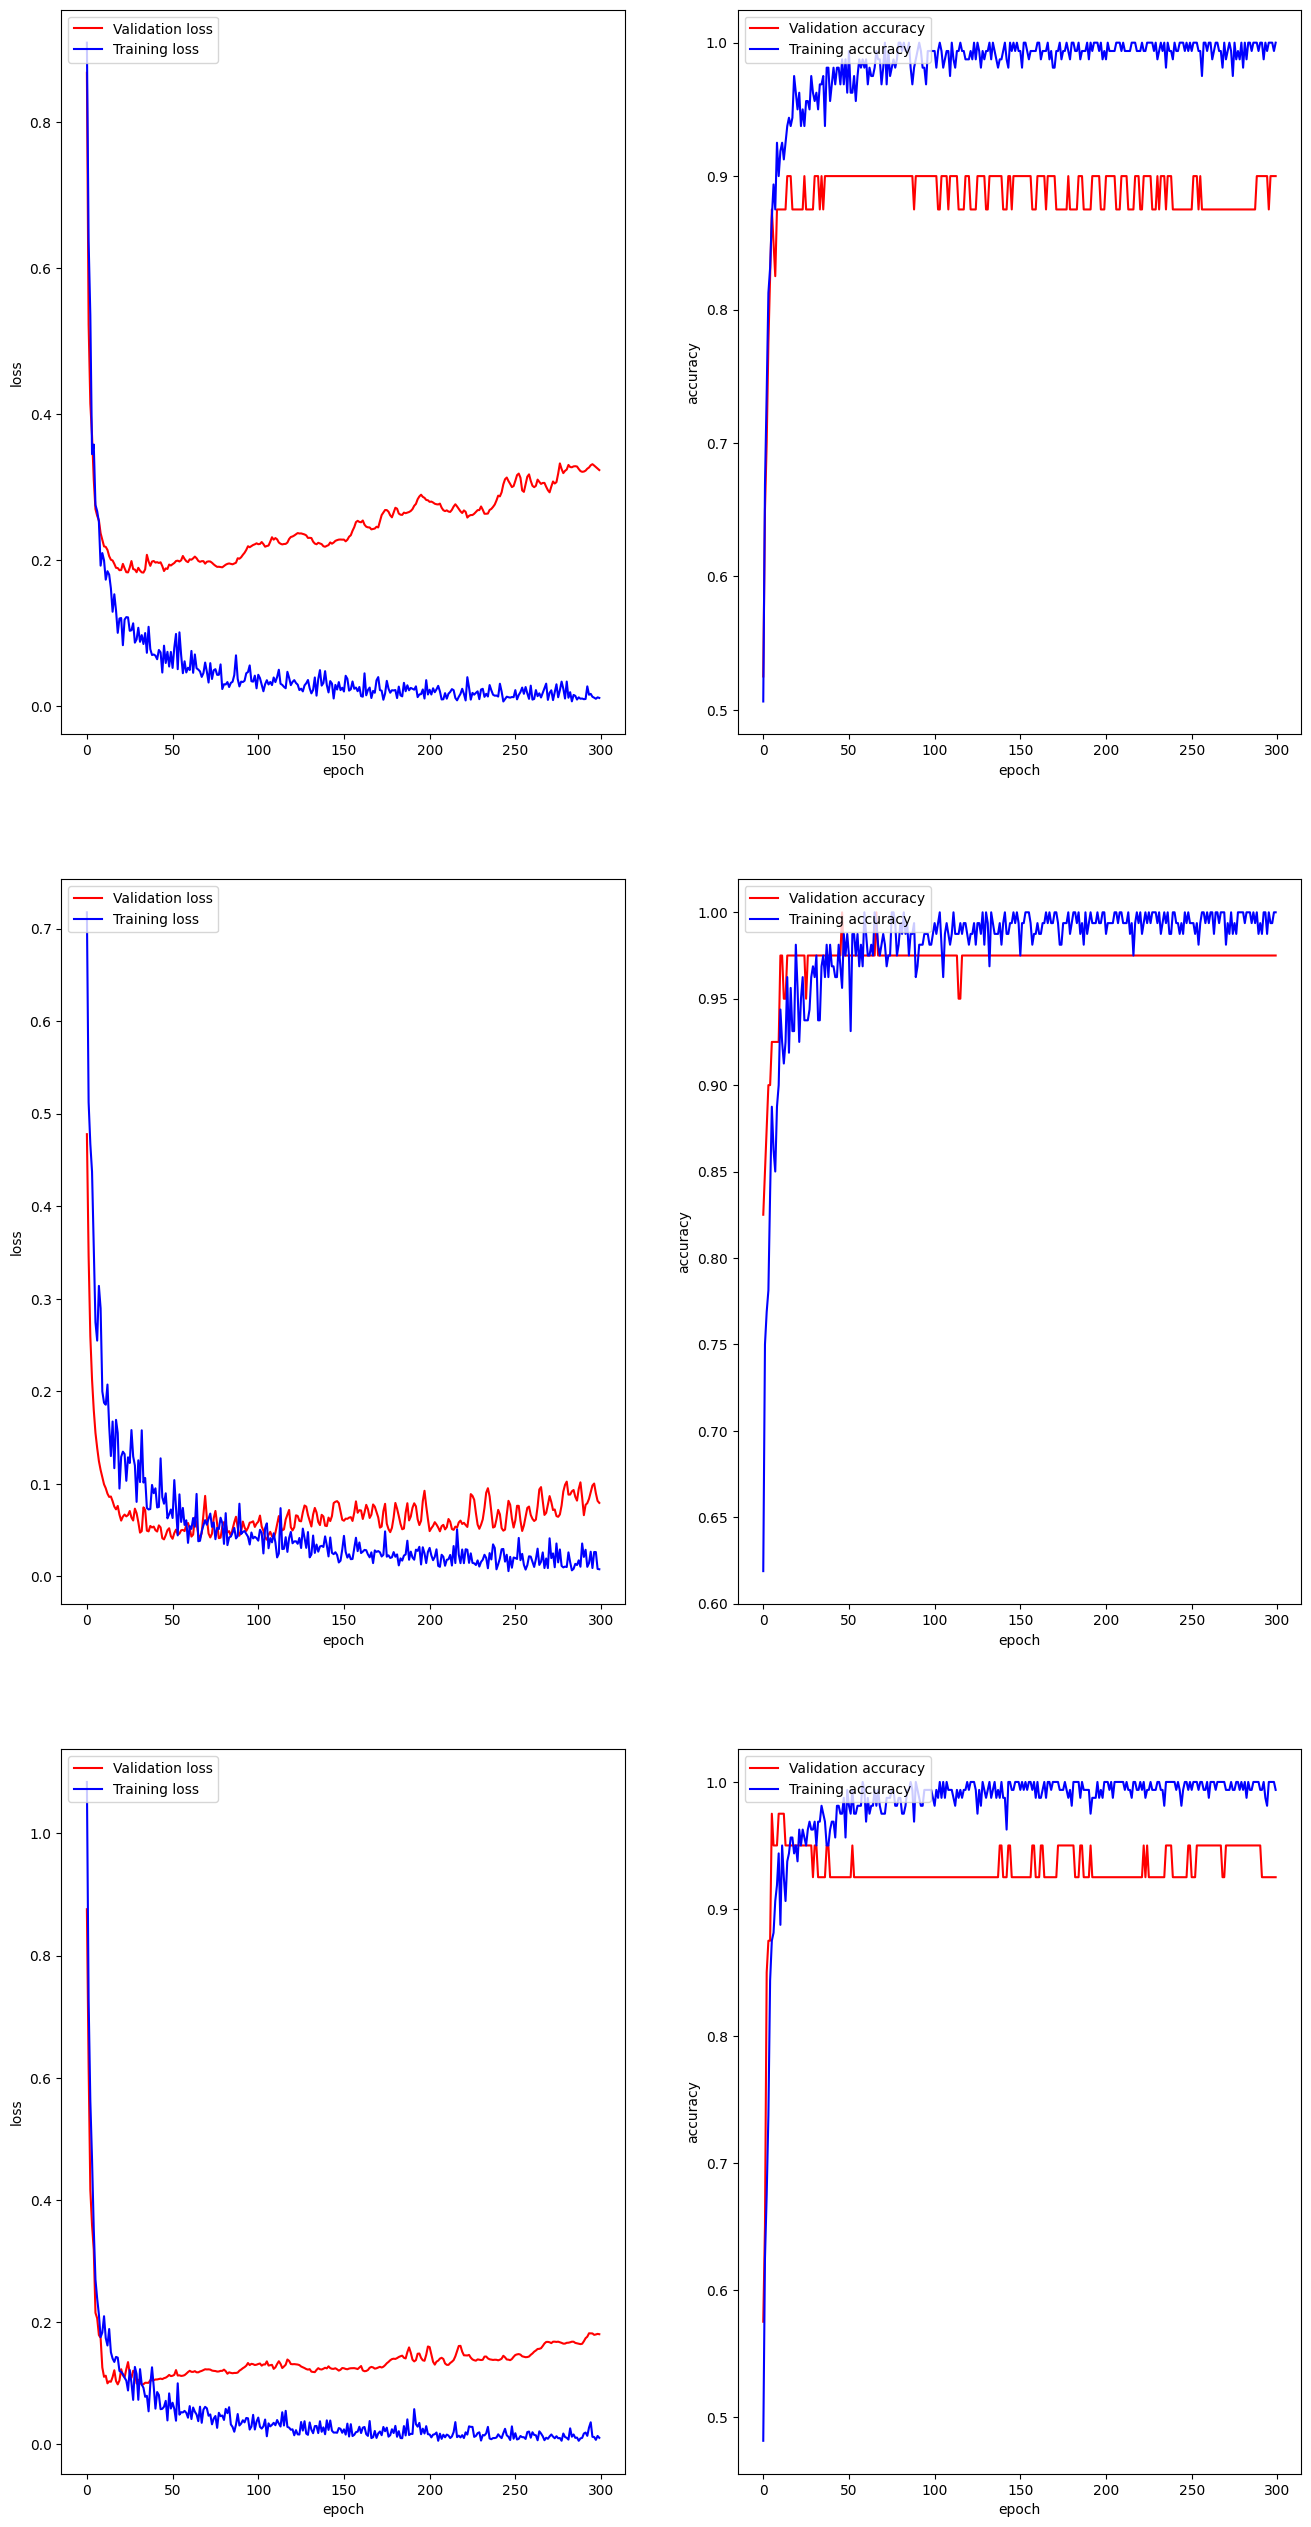

(32, 2048)
(32, 1)
Epoch 1/300
5/5 [==============================] - 7s 659ms/step - loss: 0.6678 - accuracy: 0.6500 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 2/300
5/5 [==============================] - 1s 121ms/step - loss: 0.5142 - accuracy: 0.7688 - val_loss: 0.3063 - val_accuracy: 0.9250
Epoch 3/300
5/5 [==============================] - 0s 95ms/step - loss: 0.4010 - accuracy: 0.8313 - val_loss: 0.2484 - val_accuracy: 0.9250
Epoch 4/300
5/5 [==============================] - 1s 118ms/step - loss: 0.2782 - accuracy: 0.8687 - val_loss: 0.2257 - val_accuracy: 0.9000
Epoch 5/300
5/5 [==============================] - 1s 121ms/step - loss: 0.2609 - accuracy: 0.8938 - val_loss: 0.2146 - val_accuracy: 0.9250
Epoch 6/300
5/5 [==============================] - 0s 96ms/step - loss: 0.2731 - accuracy: 0.8562 - val_loss: 0.1889 - val_accuracy: 0.9250
Epoch 7/300
5/5 [==============================] - 0s 91ms/step - loss: 0.2085 - accuracy: 0.9250 - val_loss: 0.1650 - val_accuracy: 0.90

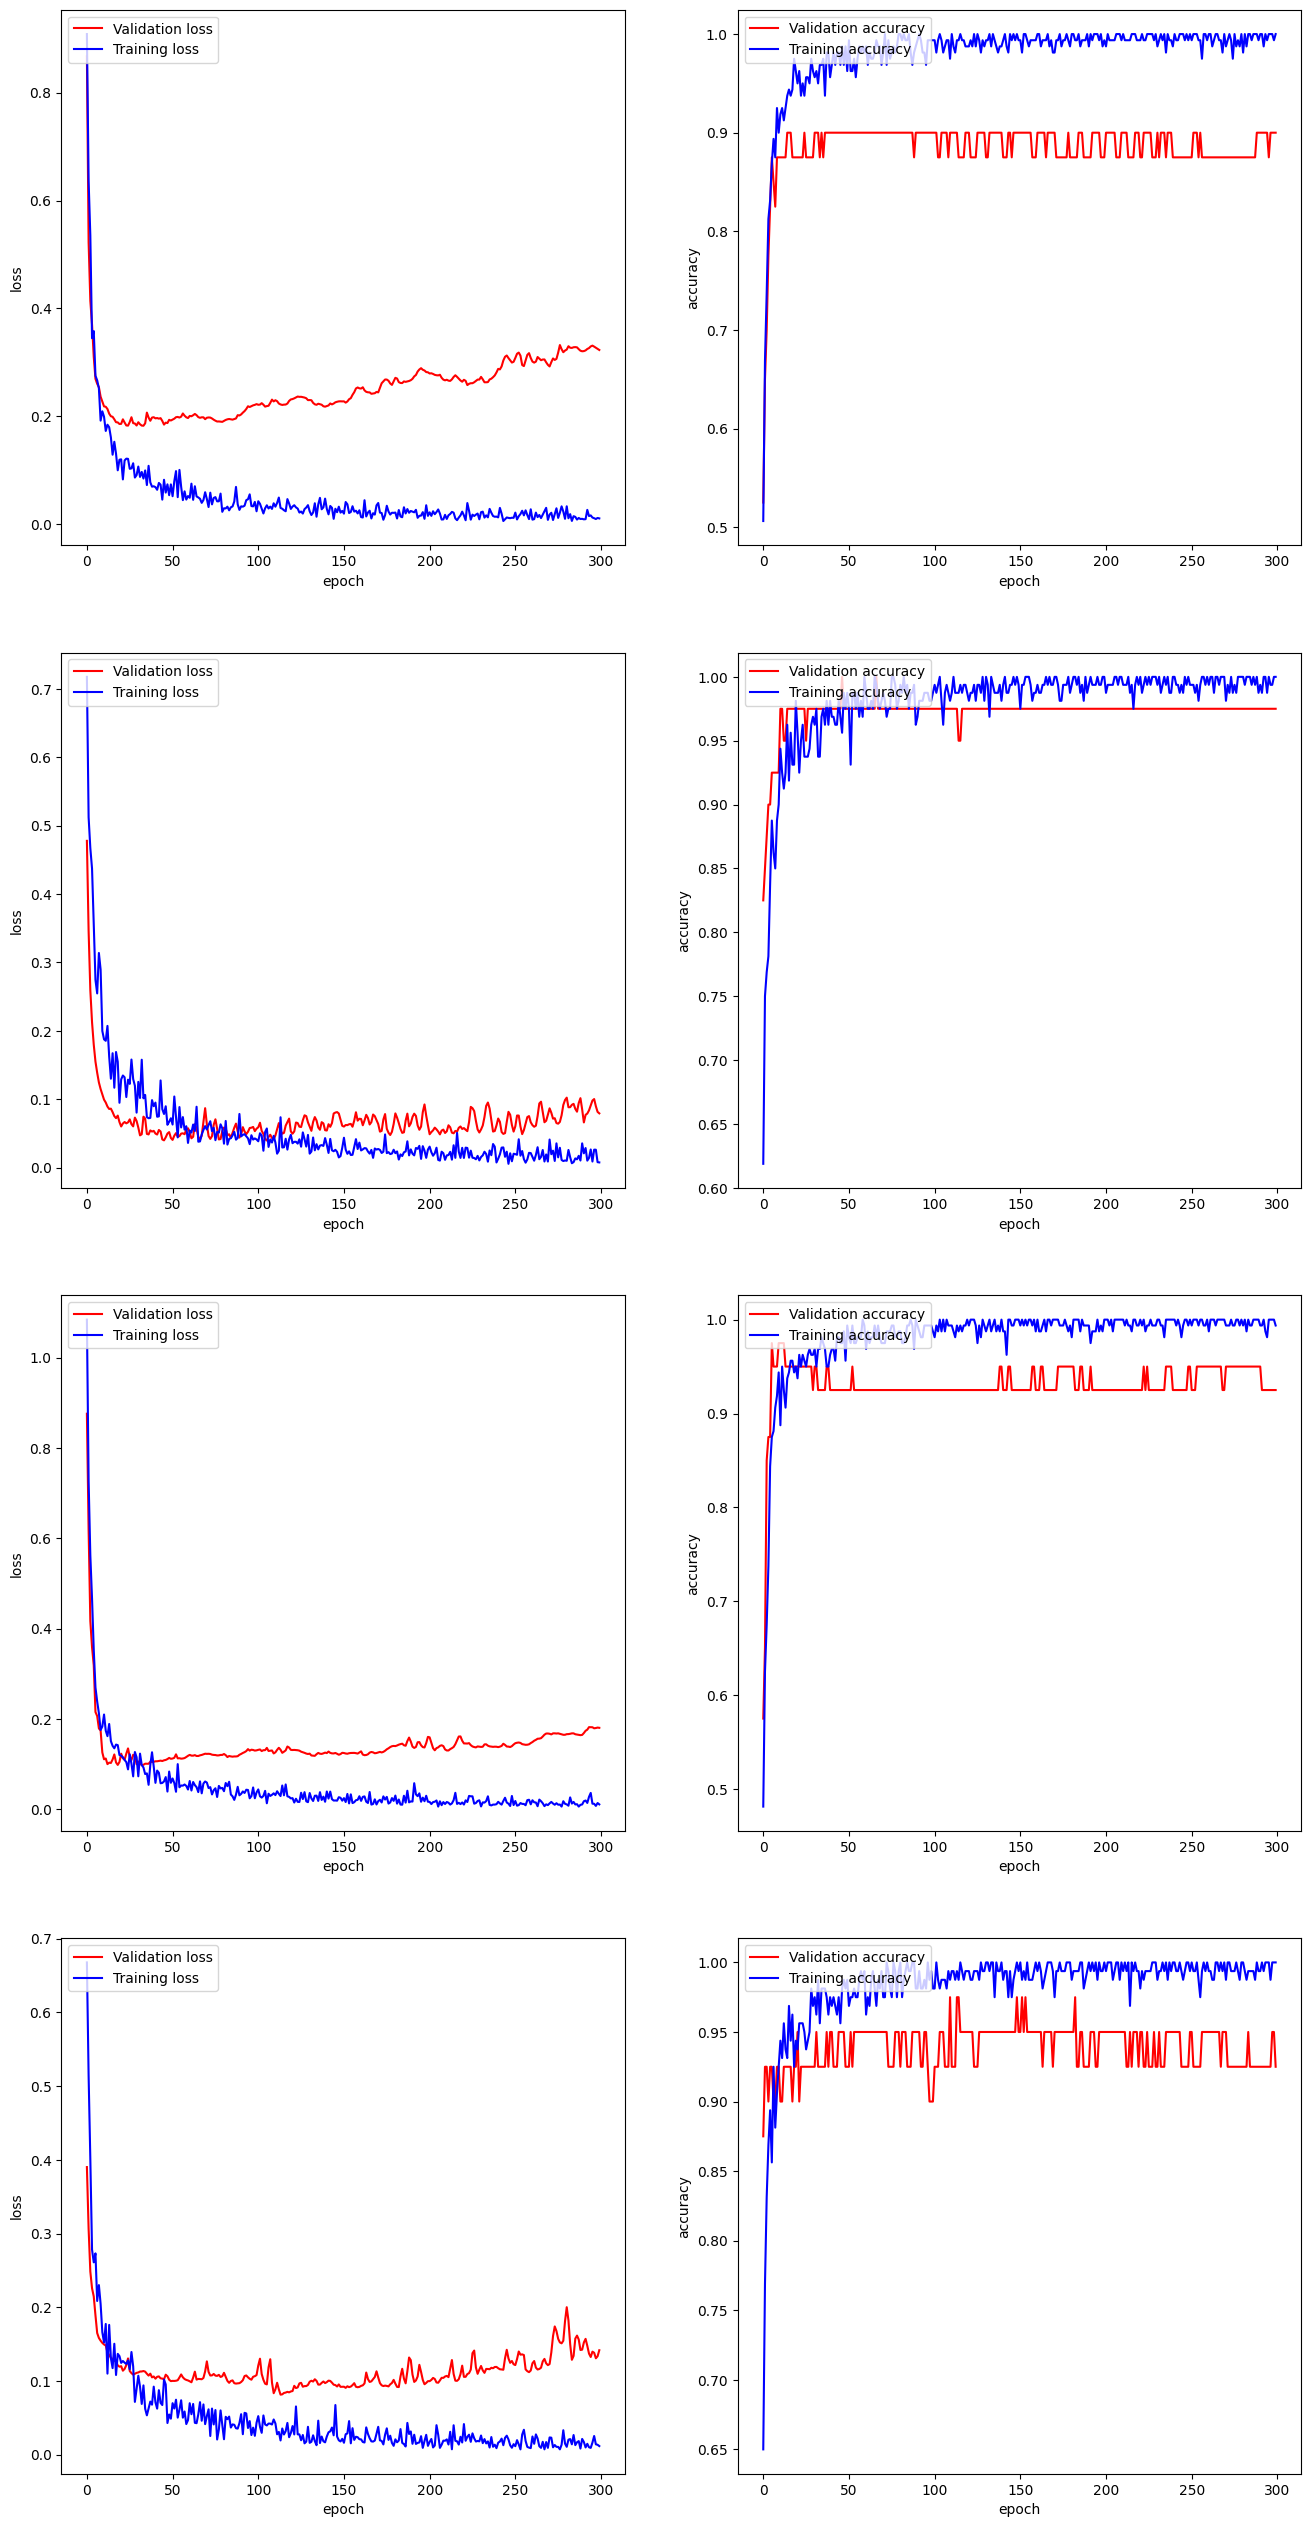

(32, 2048)
(32, 1)
Epoch 1/300
5/5 [==============================] - 6s 385ms/step - loss: 0.8852 - accuracy: 0.4938 - val_loss: 0.6128 - val_accuracy: 0.5250
Epoch 2/300
5/5 [==============================] - 0s 90ms/step - loss: 0.5826 - accuracy: 0.7000 - val_loss: 0.3407 - val_accuracy: 0.7750
Epoch 3/300
5/5 [==============================] - 0s 96ms/step - loss: 0.5089 - accuracy: 0.7125 - val_loss: 0.2256 - val_accuracy: 0.9750
Epoch 4/300
5/5 [==============================] - 1s 114ms/step - loss: 0.3769 - accuracy: 0.8313 - val_loss: 0.1822 - val_accuracy: 0.9750
Epoch 5/300
5/5 [==============================] - 1s 117ms/step - loss: 0.3277 - accuracy: 0.8500 - val_loss: 0.1529 - val_accuracy: 0.9500
Epoch 6/300
5/5 [==============================] - 0s 97ms/step - loss: 0.3203 - accuracy: 0.8438 - val_loss: 0.1367 - val_accuracy: 0.9500
Epoch 7/300
5/5 [==============================] - 0s 102ms/step - loss: 0.3075 - accuracy: 0.8438 - val_loss: 0.1287 - val_accuracy: 0.95

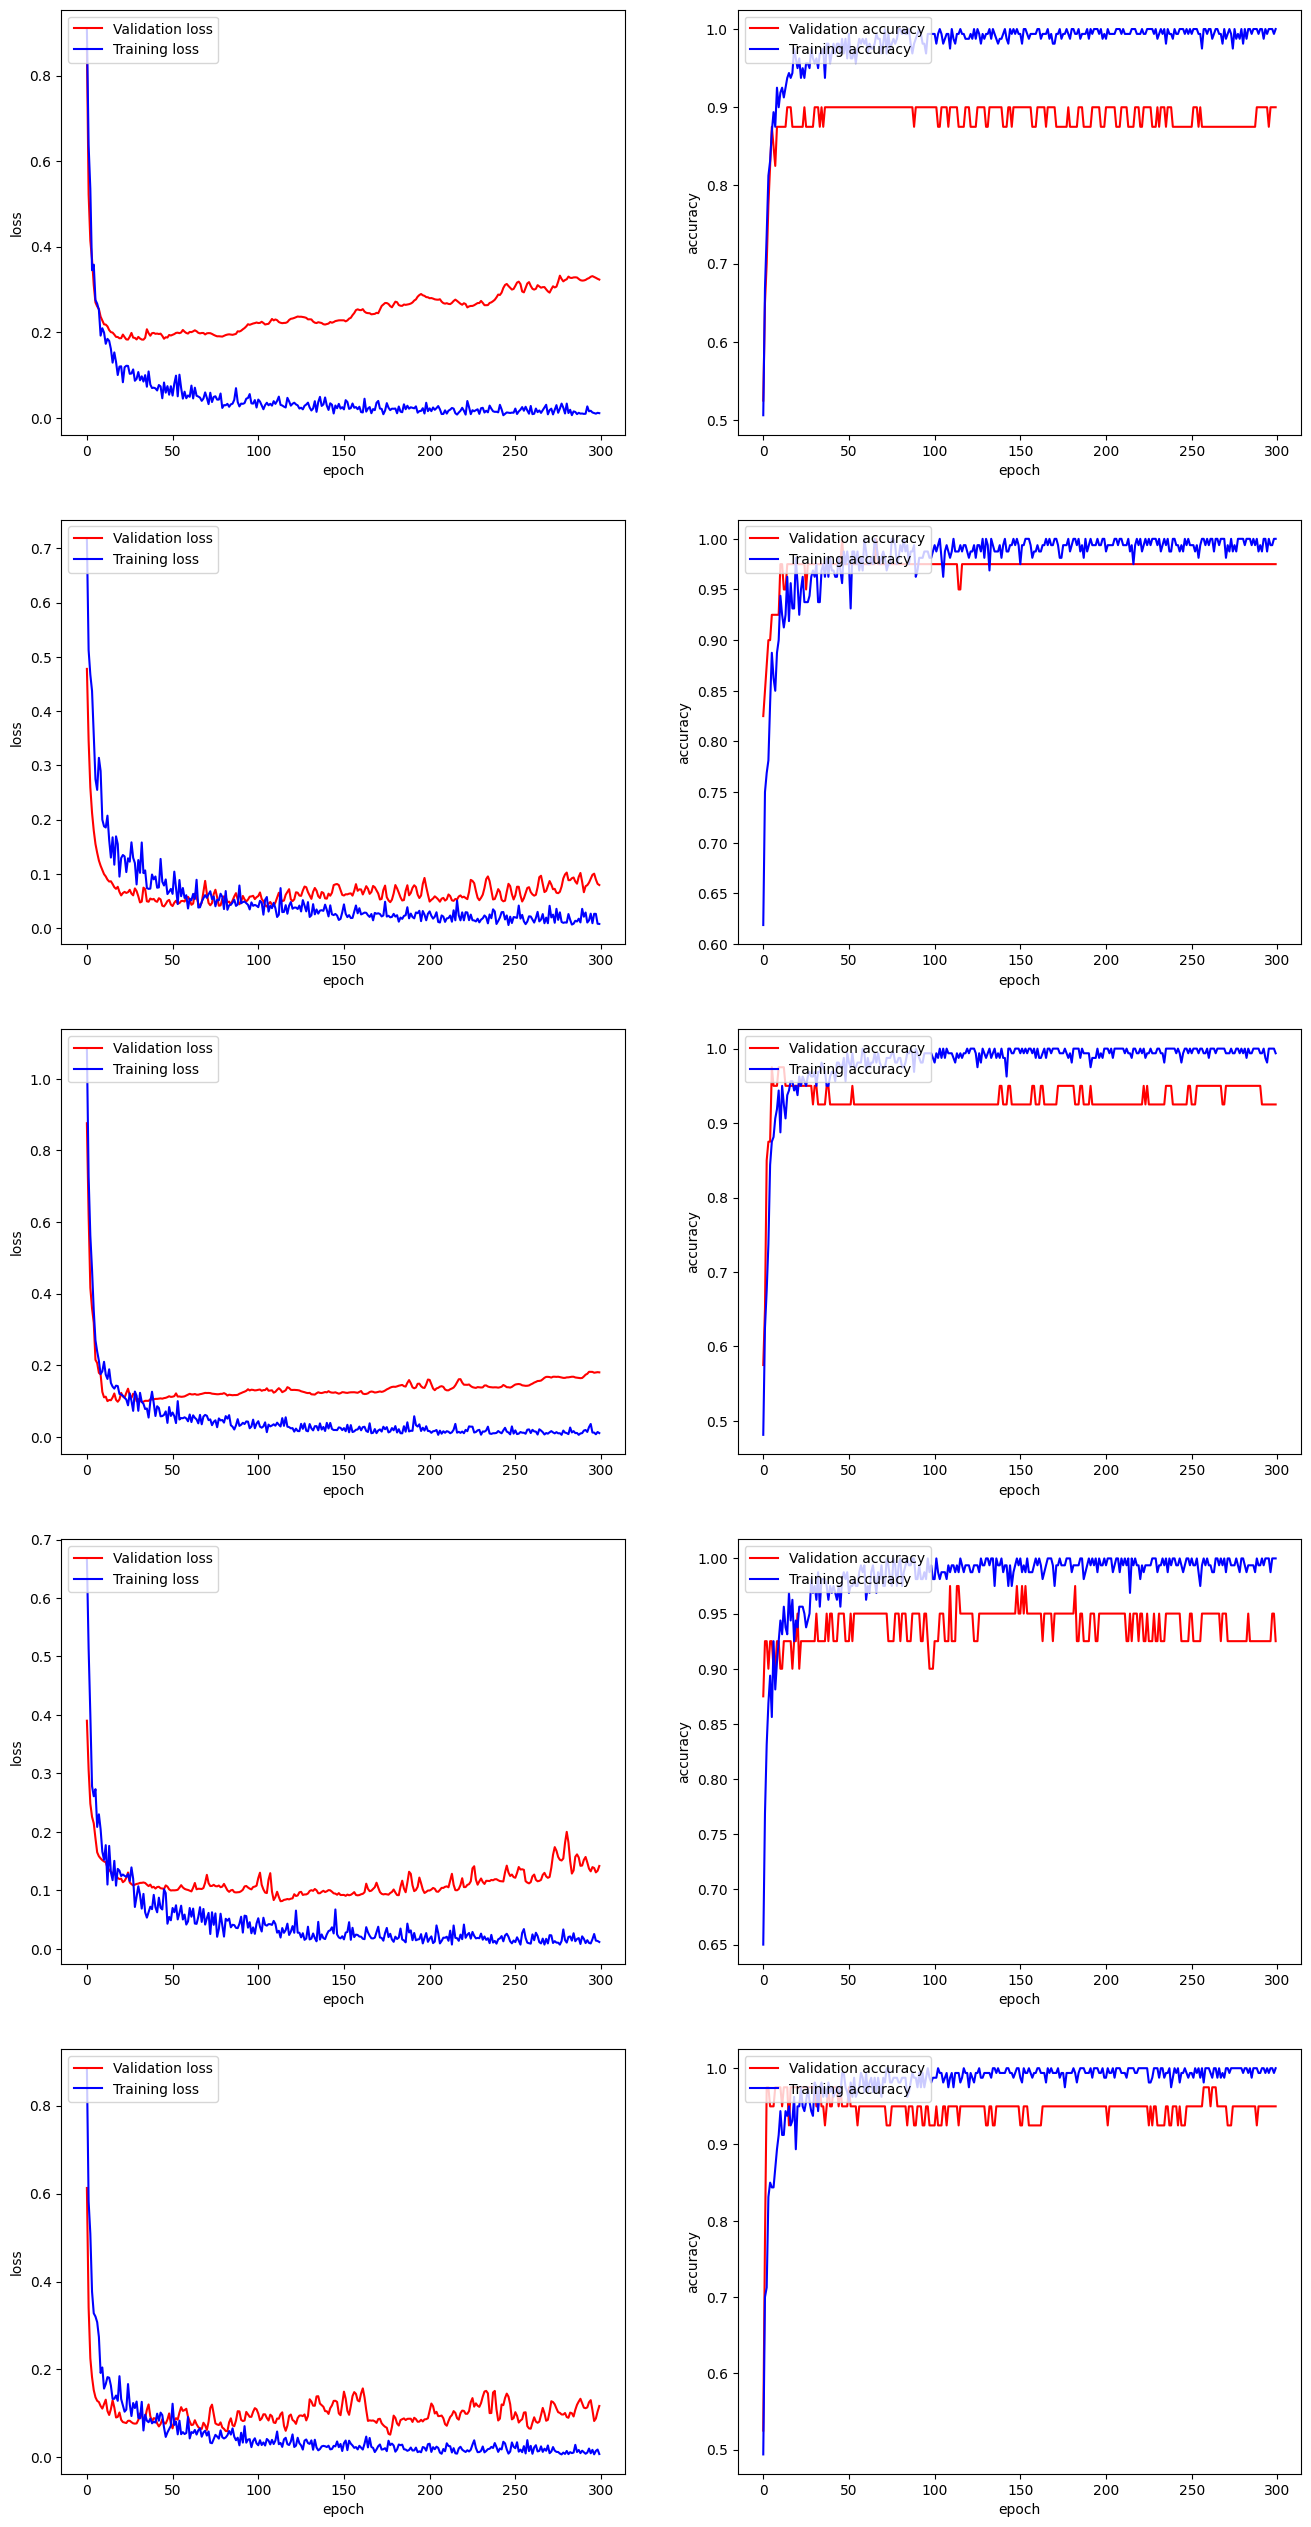

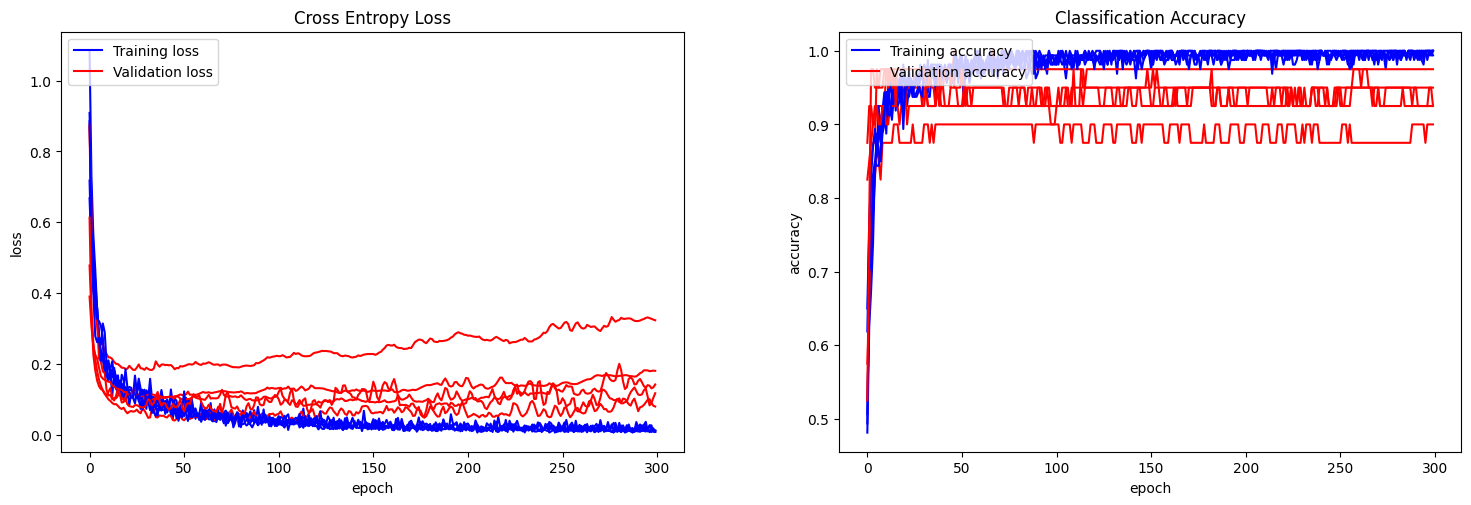

Accuracy: mean=93.500 std=2.550, n=5


In [ ]:
#resnet
IMG_SIZE = 160
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
  tf.keras.layers.RandomZoom(0.2, fill_mode="nearest")
])

preprocess_input = tf.keras.applications.resnet.preprocess_input

model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['elephant','Elephant_negative_class']
X,y=create_X_y (my_path,my_classes)

X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)
n_folds=5
epochs=300
batch_size=32

run_evaluation_tl(X_copy, y_copy, n_folds, epochs, batch_size, model)

In [ ]:
#VGG19
IMG_SIZE = 160
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
  tf.keras.layers.RandomZoom(0.2, fill_mode="nearest")
])

preprocess_input = tf.keras.applications.vgg19.preprocess_input

model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['elephant','Elephant_negative_class']
X,y=create_X_y (my_path,my_classes)

X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)
n_folds=5
epochs=300
batch_size=32

run_evaluation_tl(X_copy, y_copy, n_folds, epochs, batch_size, model)

Output hidden; open in https://colab.research.google.com to view.

58889256/58889256 [==============================] - 1s 0us/step
(32, 512)
(32, 1)
Epoch 1/300
5/5 [==============================] - 2s 165ms/step - loss: 2.8385 - accuracy: 0.4313 - val_loss: 2.8986 - val_accuracy: 0.3250
Epoch 2/300
5/5 [==============================] - 0s 92ms/step - loss: 2.0901 - accuracy: 0.5188 - val_loss: 2.2098 - val_accuracy: 0.4000
Epoch 3/300
5/5 [==============================] - 0s 91ms/step - loss: 2.1532 - accuracy: 0.5125 - val_loss: 1.7953 - val_accuracy: 0.5000
Epoch 4/300
5/5 [==============================] - 0s 92ms/step - loss: 1.3793 - accuracy: 0.6000 - val_loss: 1.5176 - val_accuracy: 0.5750
Epoch 5/300
5/5 [==============================] - 0s 91ms/step - loss: 1.3975 - accuracy: 0.5813 - val_loss: 1.2476 - val_accuracy: 0.6500
Epoch 6/300
5/5 [==============================] - 0s 91ms/step - loss: 1.1343 - accuracy: 0.6250 - val_loss: 1.0494 - val_accuracy: 0.6500
Epoch 7/300
5/5 [==============================] - 0s 91ms/step - loss: 1.01

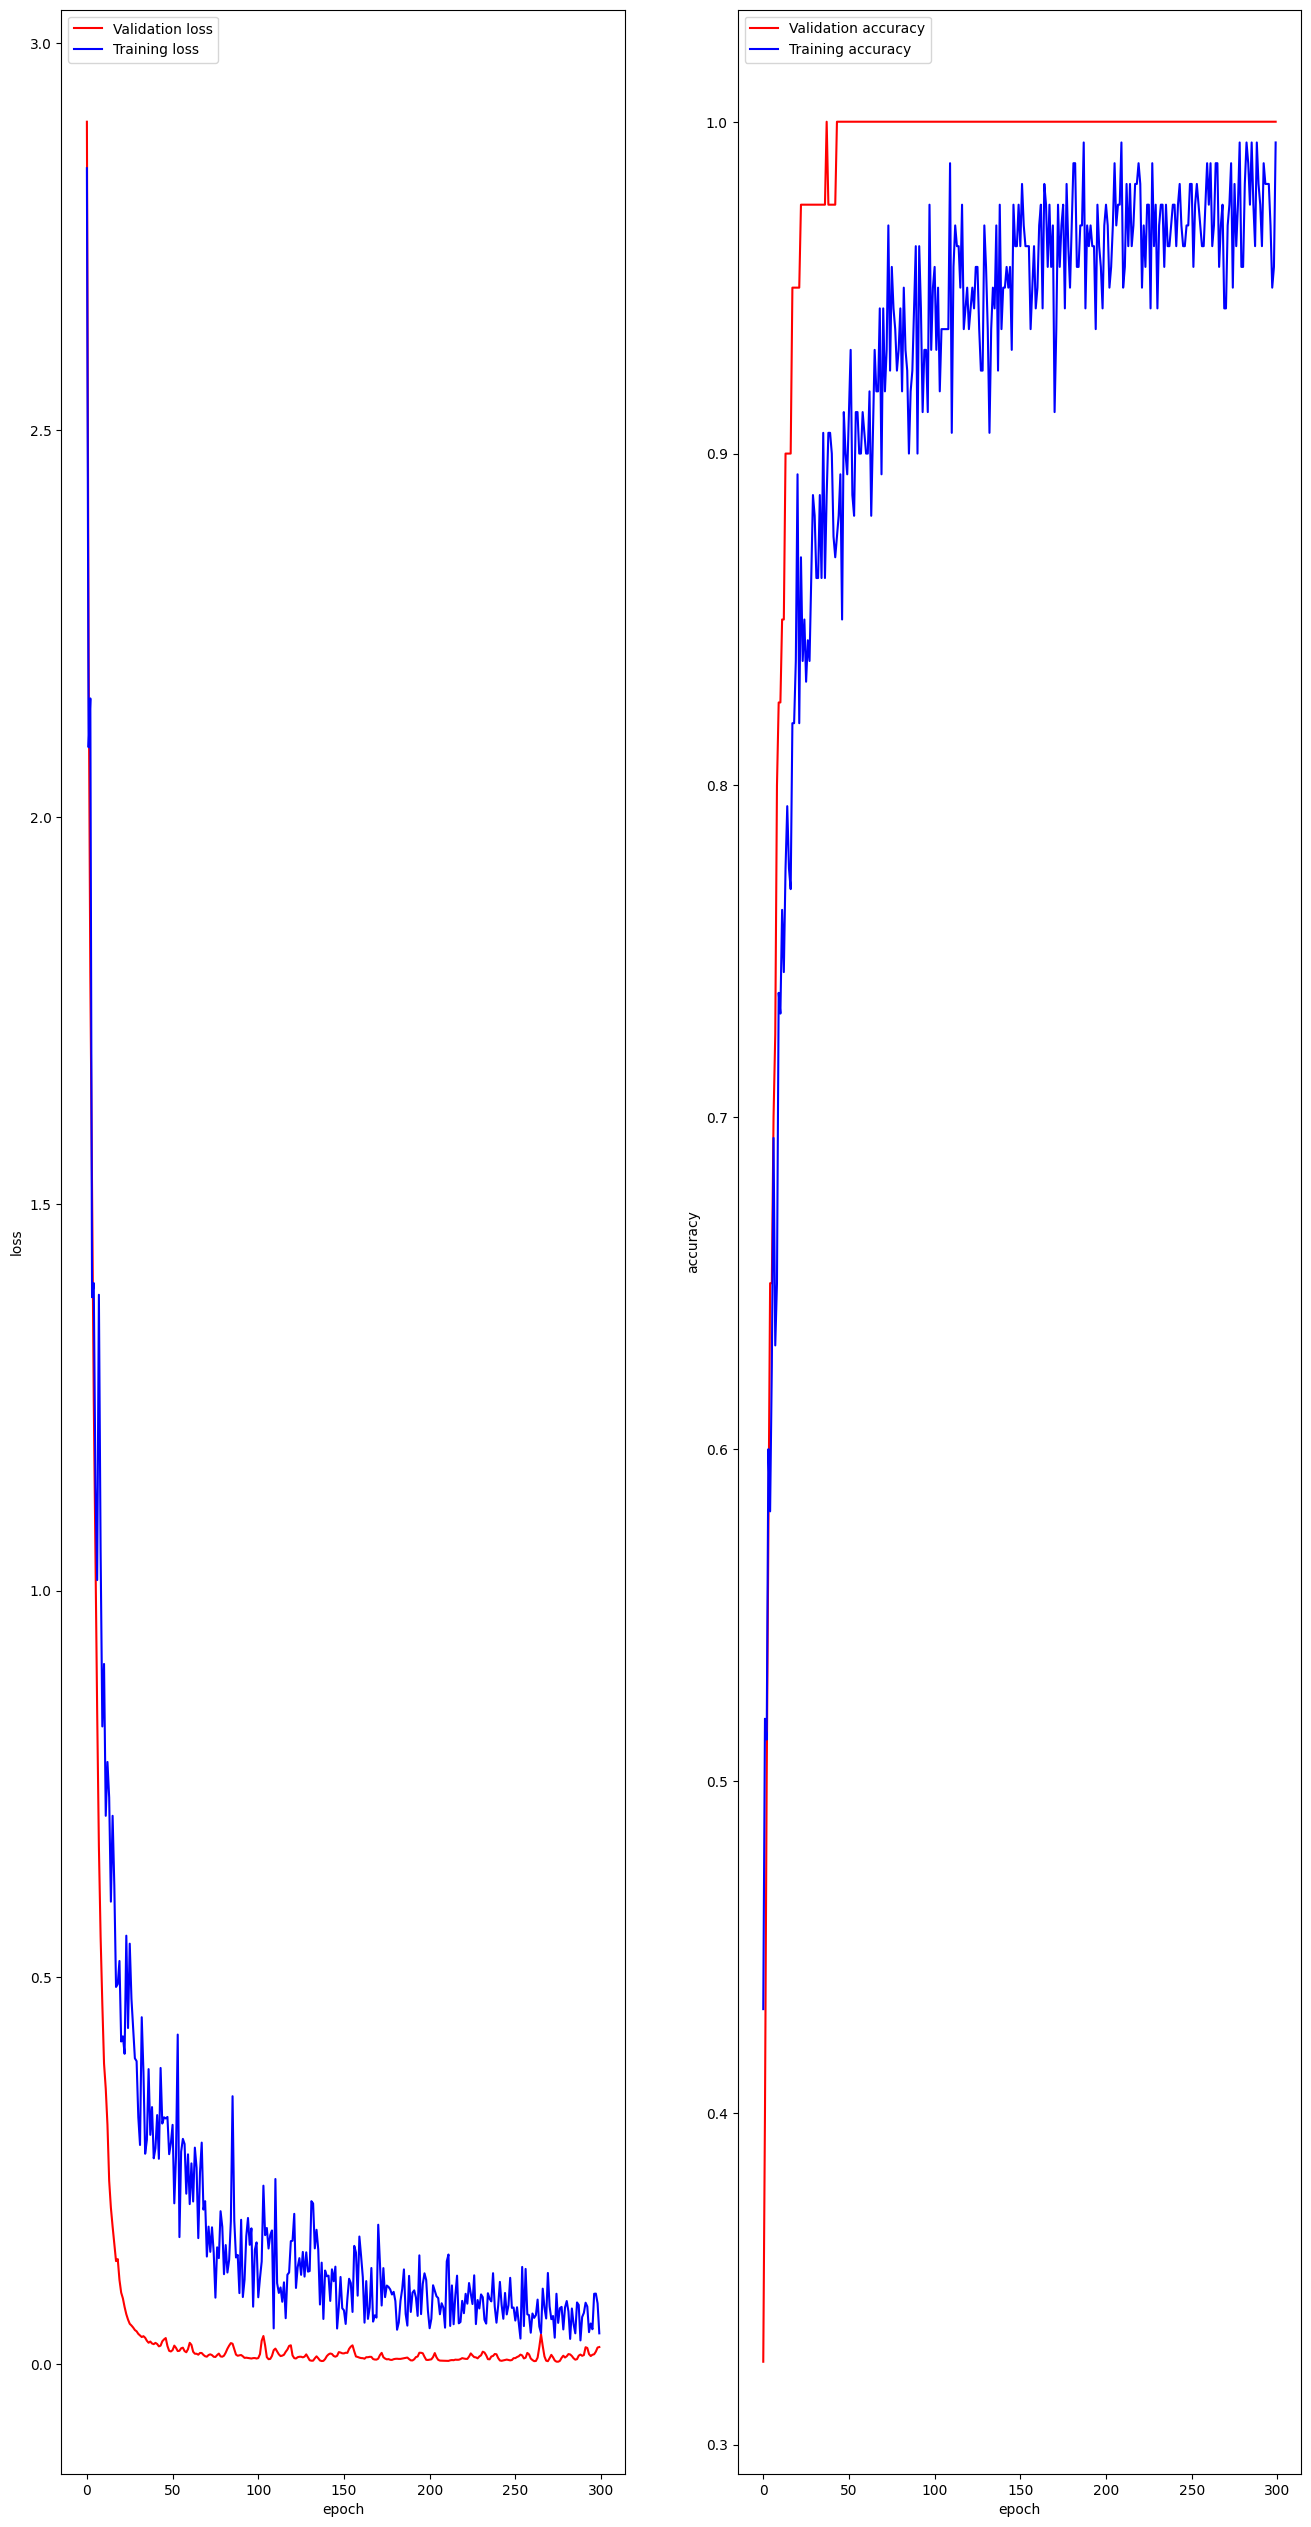

(32, 512)
(32, 1)
Epoch 1/300
5/5 [==============================] - 2s 165ms/step - loss: 2.3178 - accuracy: 0.4812 - val_loss: 1.4166 - val_accuracy: 0.5750
Epoch 2/300
5/5 [==============================] - 0s 95ms/step - loss: 2.0172 - accuracy: 0.5437 - val_loss: 1.1418 - val_accuracy: 0.6000
Epoch 3/300
5/5 [==============================] - 0s 98ms/step - loss: 1.5621 - accuracy: 0.5938 - val_loss: 0.8935 - val_accuracy: 0.6750
Epoch 4/300
5/5 [==============================] - 0s 97ms/step - loss: 1.2454 - accuracy: 0.6313 - val_loss: 0.7706 - val_accuracy: 0.7250
Epoch 5/300
5/5 [==============================] - 0s 97ms/step - loss: 1.2807 - accuracy: 0.6375 - val_loss: 0.6980 - val_accuracy: 0.7750
Epoch 6/300
5/5 [==============================] - 0s 101ms/step - loss: 1.1465 - accuracy: 0.7000 - val_loss: 0.5420 - val_accuracy: 0.7750
Epoch 7/300
5/5 [==============================] - 1s 116ms/step - loss: 1.0066 - accuracy: 0.6625 - val_loss: 0.4482 - val_accuracy: 0.8250

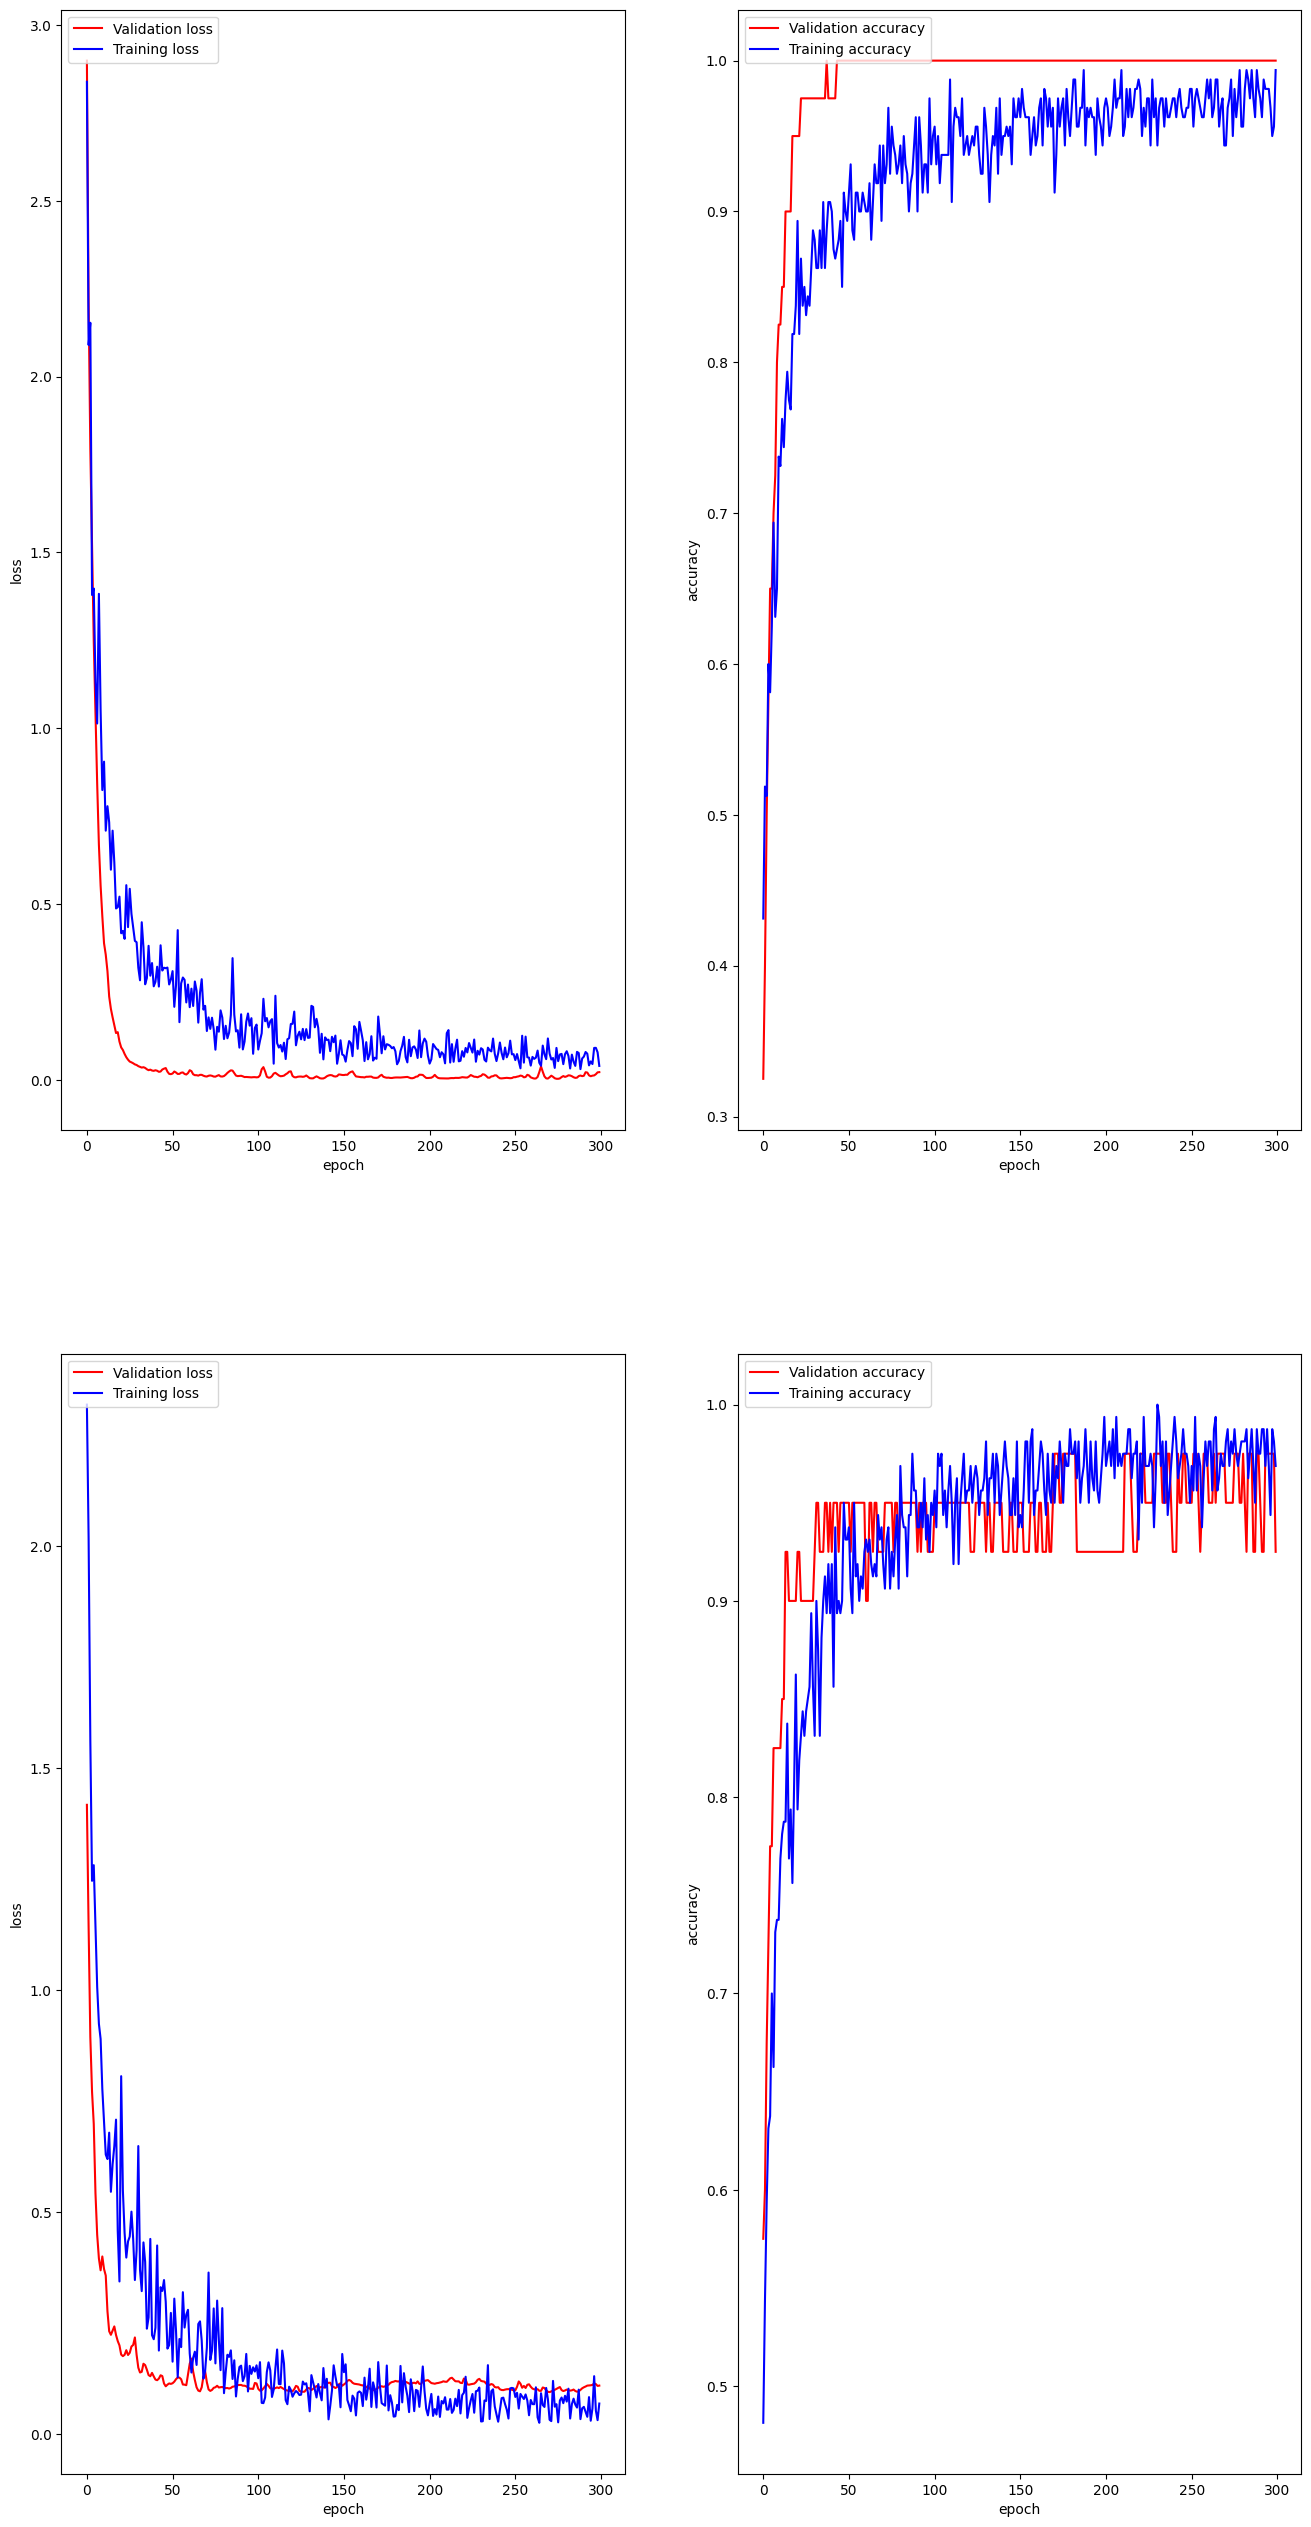

(32, 512)
(32, 1)
Epoch 1/300
5/5 [==============================] - 2s 165ms/step - loss: 2.2498 - accuracy: 0.5375 - val_loss: 2.4941 - val_accuracy: 0.5000
Epoch 2/300
5/5 [==============================] - 0s 99ms/step - loss: 1.6793 - accuracy: 0.5750 - val_loss: 3.1870 - val_accuracy: 0.4750
Epoch 3/300
5/5 [==============================] - 0s 99ms/step - loss: 1.5852 - accuracy: 0.6375 - val_loss: 2.6192 - val_accuracy: 0.5250
Epoch 4/300
5/5 [==============================] - 0s 99ms/step - loss: 1.8222 - accuracy: 0.6062 - val_loss: 1.9423 - val_accuracy: 0.5750
Epoch 5/300
5/5 [==============================] - 0s 97ms/step - loss: 1.0587 - accuracy: 0.6500 - val_loss: 1.5561 - val_accuracy: 0.6000
Epoch 6/300
5/5 [==============================] - 1s 111ms/step - loss: 0.9895 - accuracy: 0.6687 - val_loss: 1.2260 - val_accuracy: 0.6750
Epoch 7/300
5/5 [==============================] - 0s 99ms/step - loss: 1.0403 - accuracy: 0.6812 - val_loss: 1.0219 - val_accuracy: 0.6750


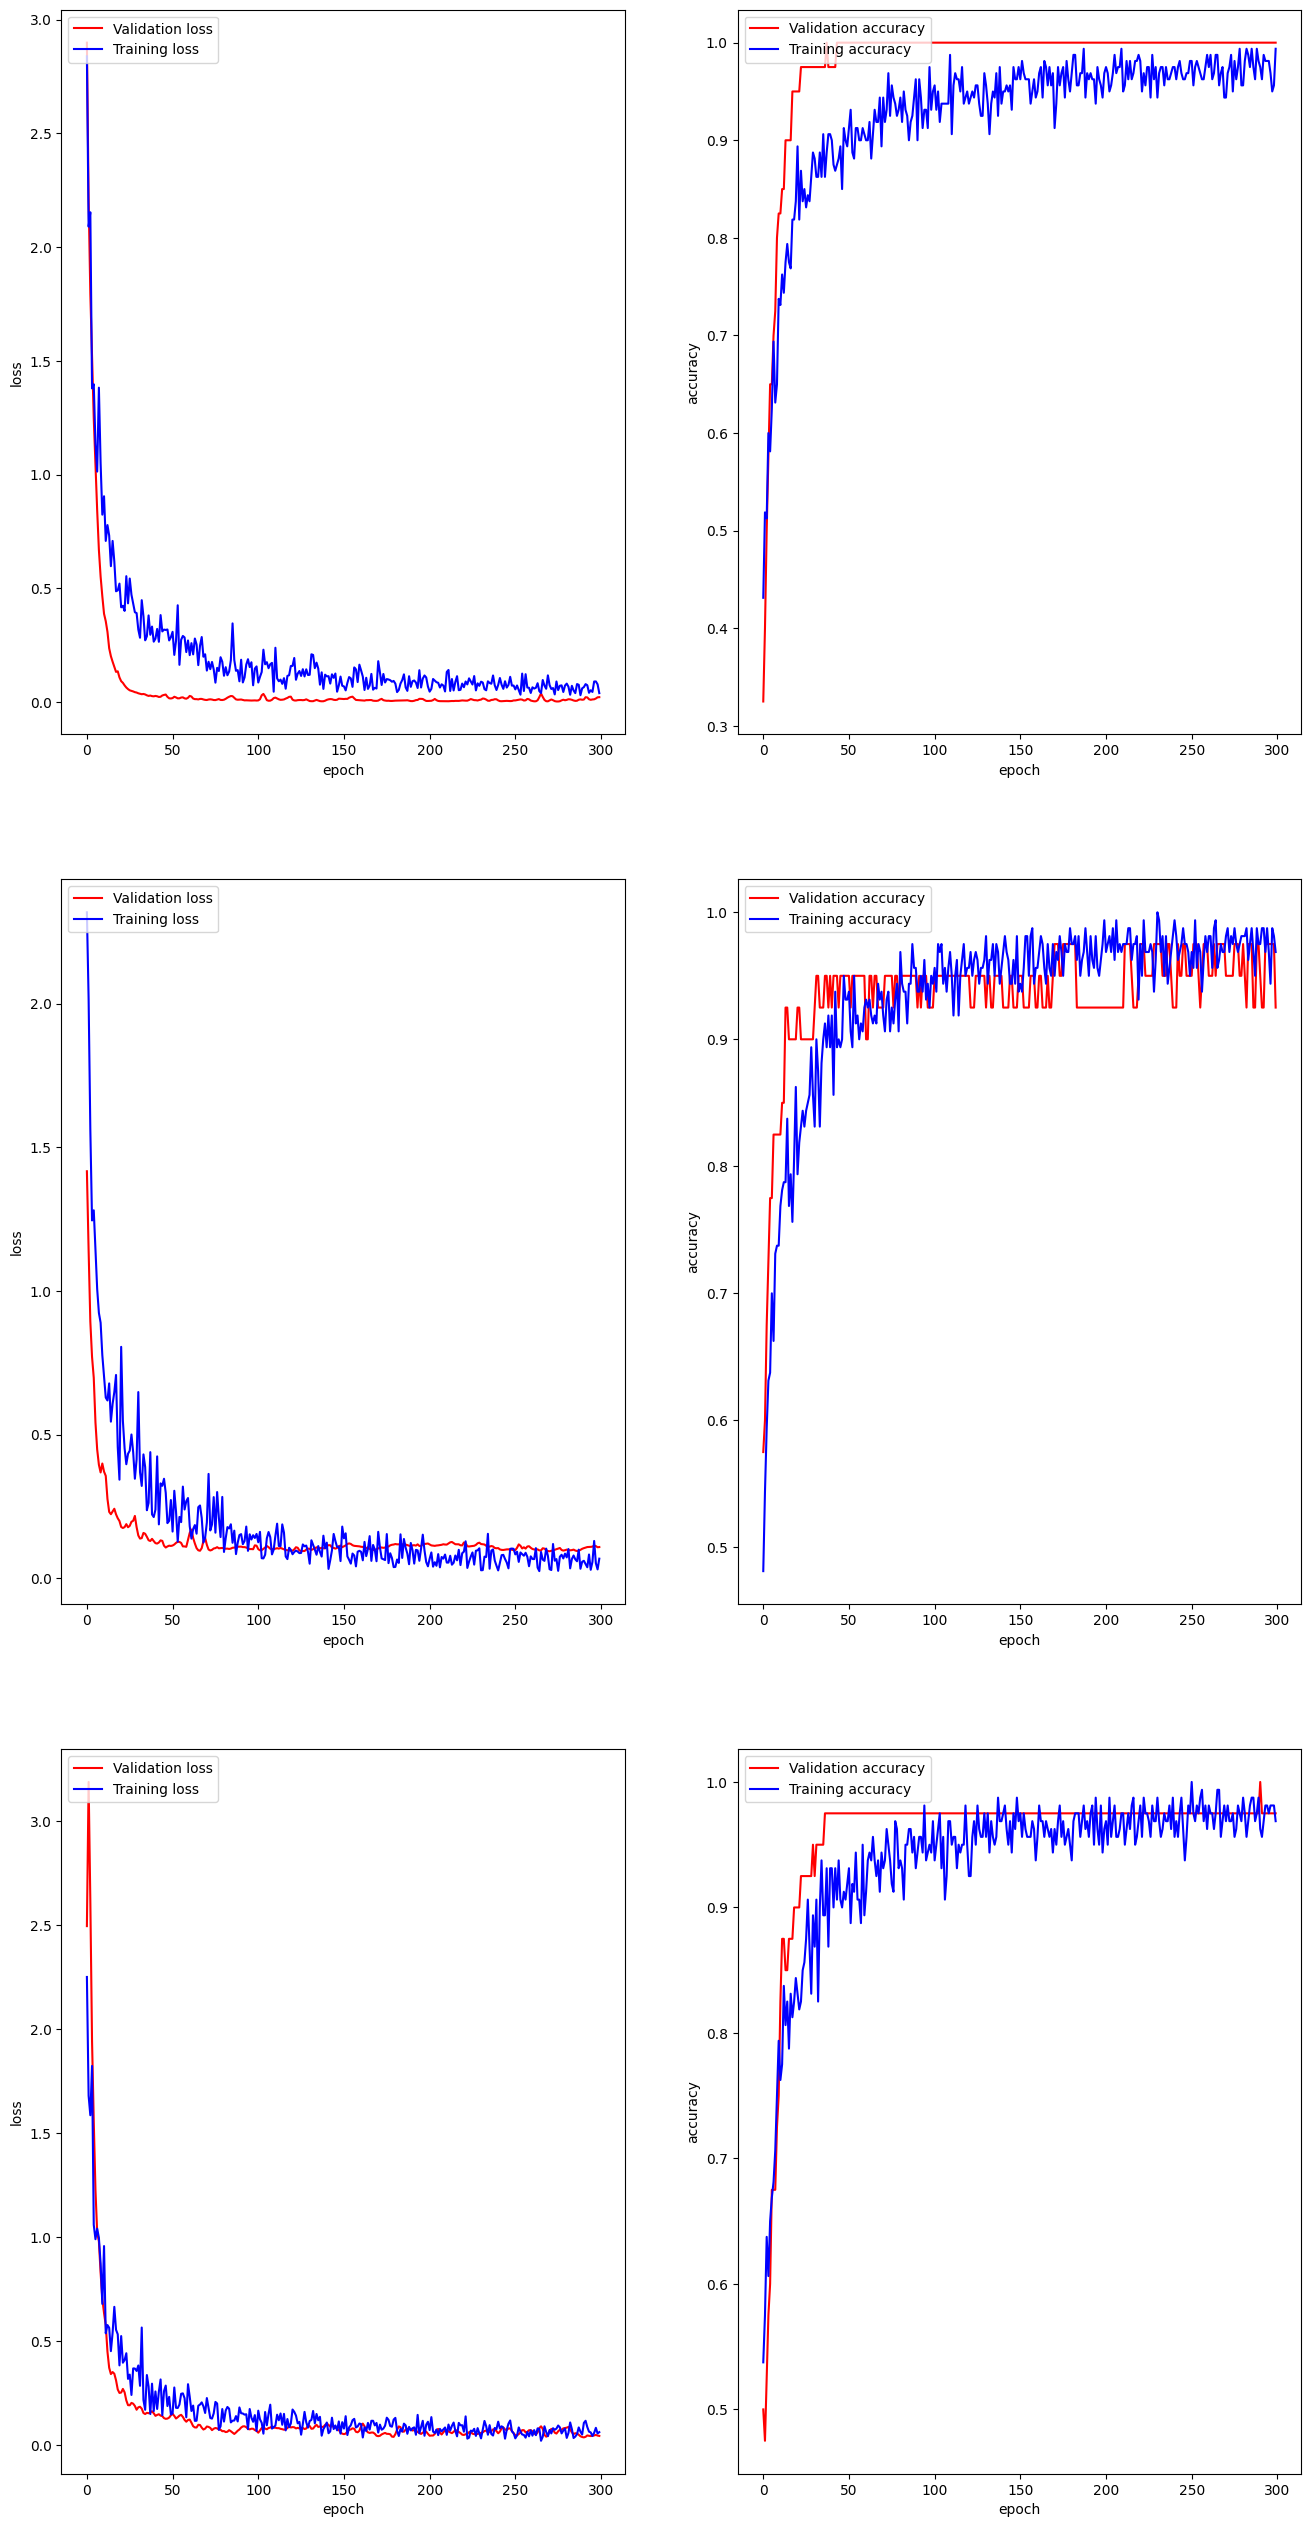

(32, 512)
(32, 1)
Epoch 1/300
5/5 [==============================] - 2s 161ms/step - loss: 3.4990 - accuracy: 0.5000 - val_loss: 3.1604 - val_accuracy: 0.2250
Epoch 2/300
5/5 [==============================] - 0s 98ms/step - loss: 2.5249 - accuracy: 0.4250 - val_loss: 2.6769 - val_accuracy: 0.3750
Epoch 3/300
5/5 [==============================] - 0s 97ms/step - loss: 2.4387 - accuracy: 0.4625 - val_loss: 2.3597 - val_accuracy: 0.3750
Epoch 4/300
5/5 [==============================] - 0s 100ms/step - loss: 1.9642 - accuracy: 0.4750 - val_loss: 2.0296 - val_accuracy: 0.4000
Epoch 5/300
5/5 [==============================] - 0s 97ms/step - loss: 1.9564 - accuracy: 0.5250 - val_loss: 1.8132 - val_accuracy: 0.4750
Epoch 6/300
5/5 [==============================] - 0s 100ms/step - loss: 1.8961 - accuracy: 0.5063 - val_loss: 1.6035 - val_accuracy: 0.5250
Epoch 7/300
5/5 [==============================] - 0s 99ms/step - loss: 1.1790 - accuracy: 0.6062 - val_loss: 1.3712 - val_accuracy: 0.5250

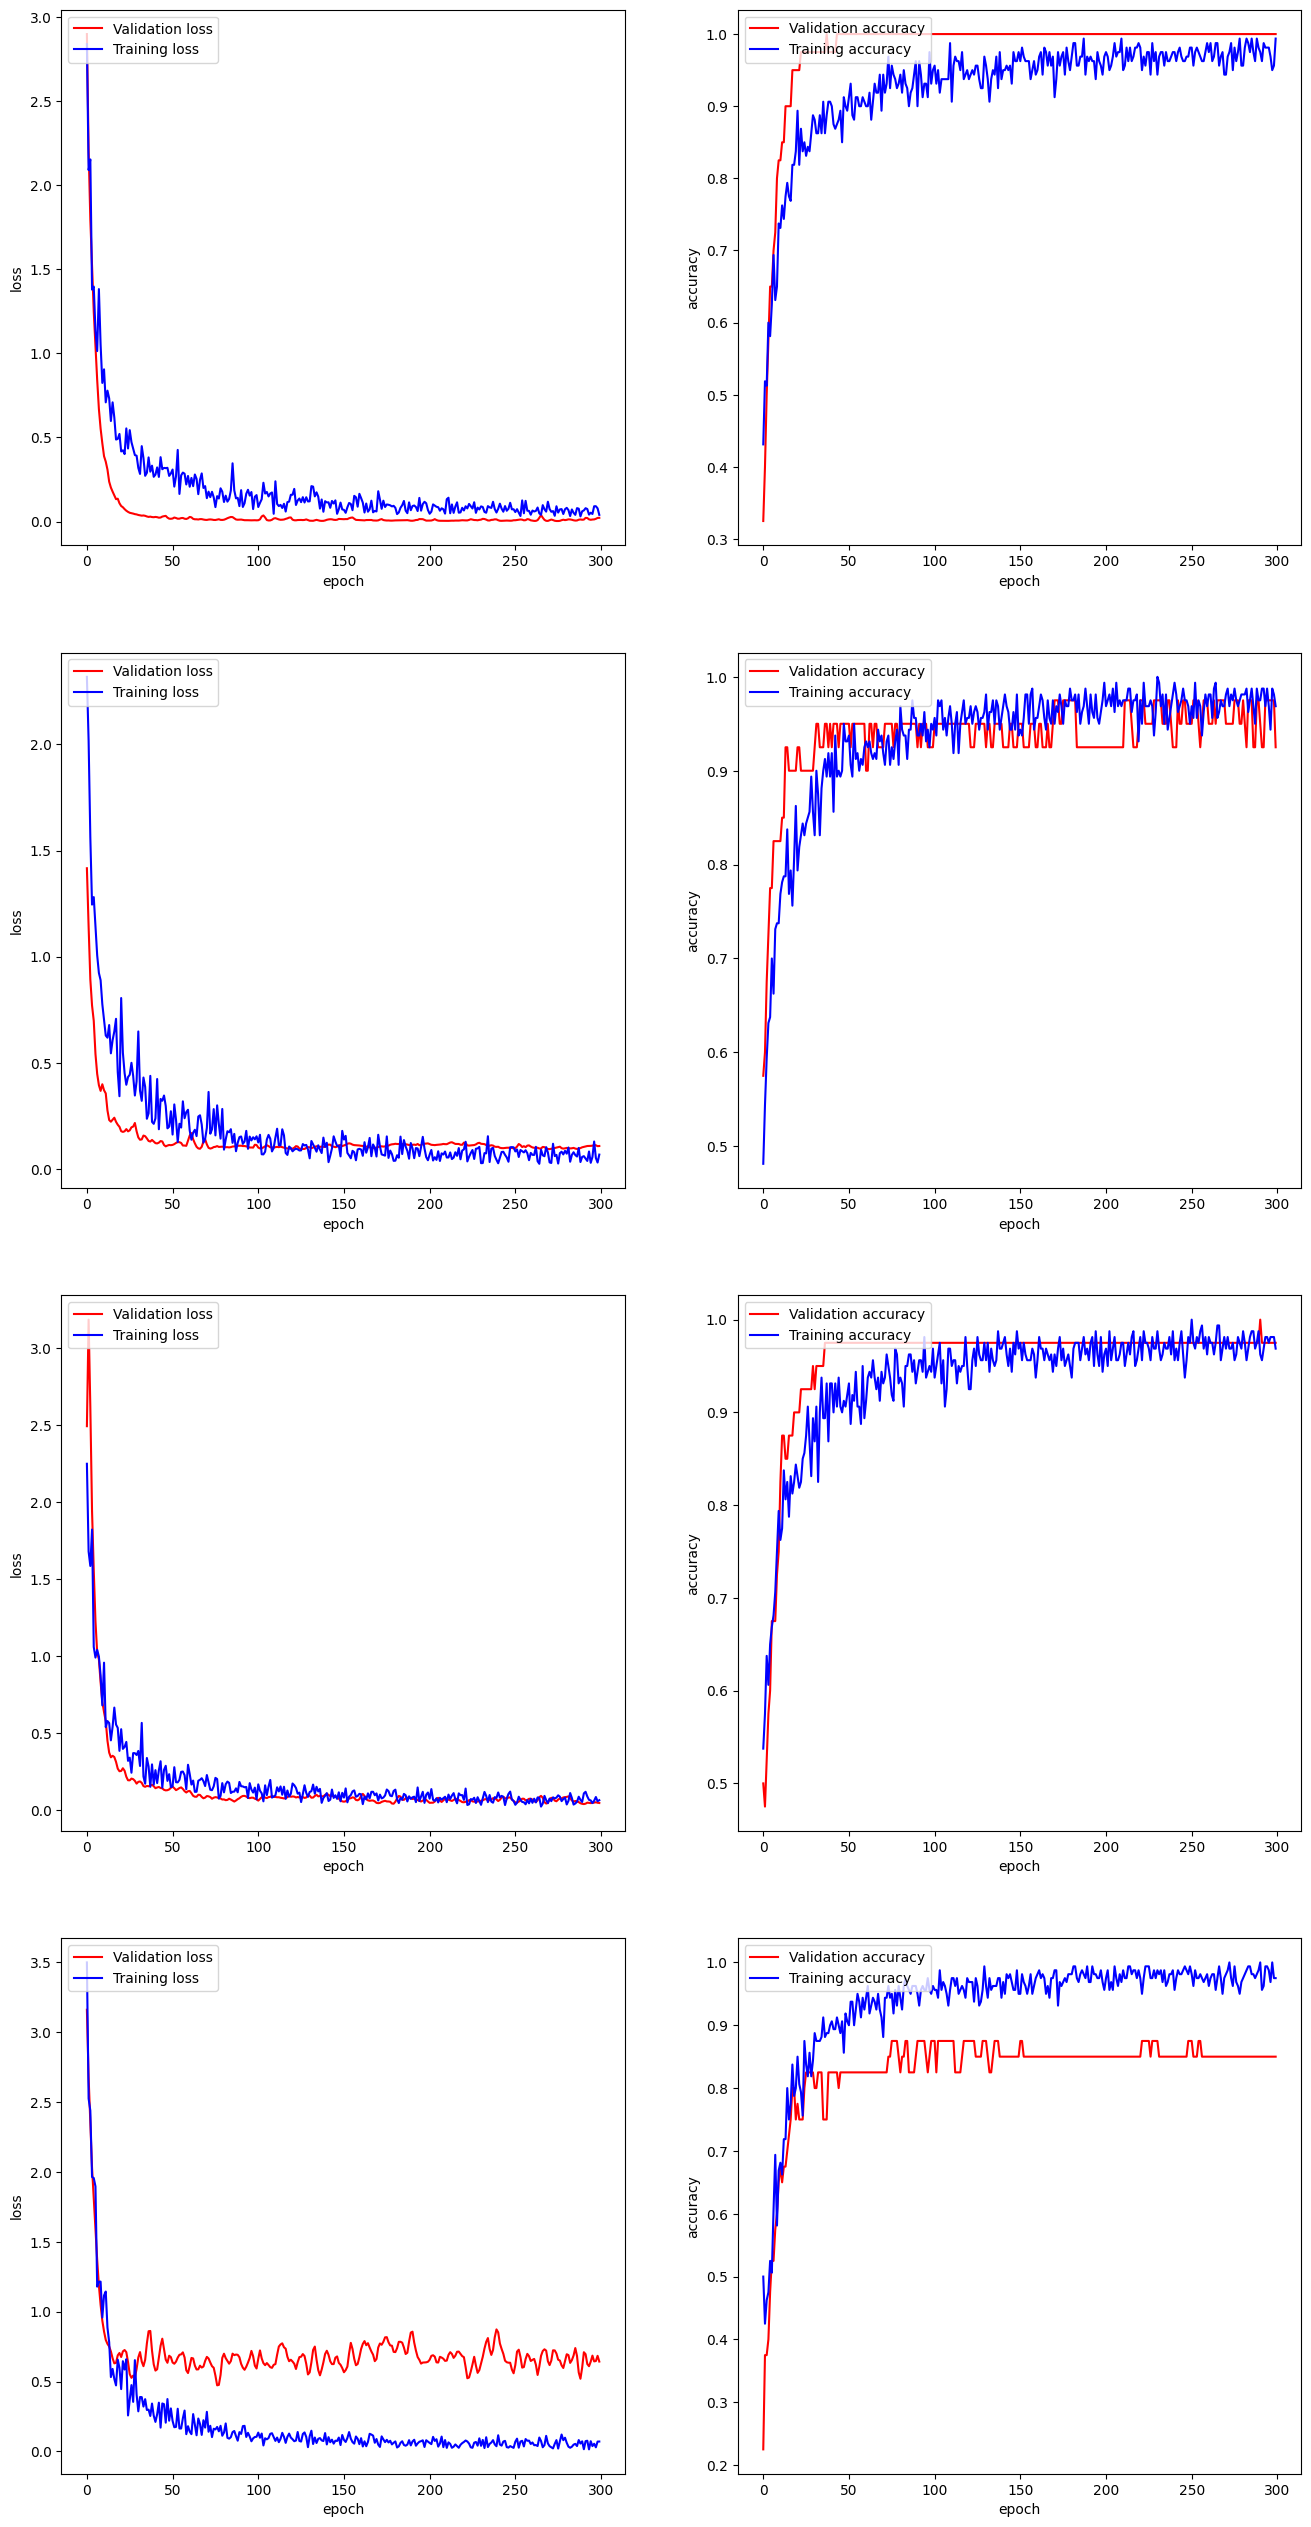

(32, 512)
(32, 1)
Epoch 1/300
5/5 [==============================] - 3s 169ms/step - loss: 2.0233 - accuracy: 0.5688 - val_loss: 2.3918 - val_accuracy: 0.4500
Epoch 2/300
5/5 [==============================] - 0s 100ms/step - loss: 1.8577 - accuracy: 0.5688 - val_loss: 1.9548 - val_accuracy: 0.4250
Epoch 3/300
5/5 [==============================] - 0s 99ms/step - loss: 1.5753 - accuracy: 0.6062 - val_loss: 1.6472 - val_accuracy: 0.5000
Epoch 4/300
5/5 [==============================] - 0s 100ms/step - loss: 1.2104 - accuracy: 0.6500 - val_loss: 1.4079 - val_accuracy: 0.5250
Epoch 5/300
5/5 [==============================] - 0s 100ms/step - loss: 1.0555 - accuracy: 0.7125 - val_loss: 1.1833 - val_accuracy: 0.6250
Epoch 6/300
5/5 [==============================] - 0s 102ms/step - loss: 1.0988 - accuracy: 0.6625 - val_loss: 1.0367 - val_accuracy: 0.6750
Epoch 7/300
5/5 [==============================] - 0s 99ms/step - loss: 1.0032 - accuracy: 0.7437 - val_loss: 0.9659 - val_accuracy: 0.70

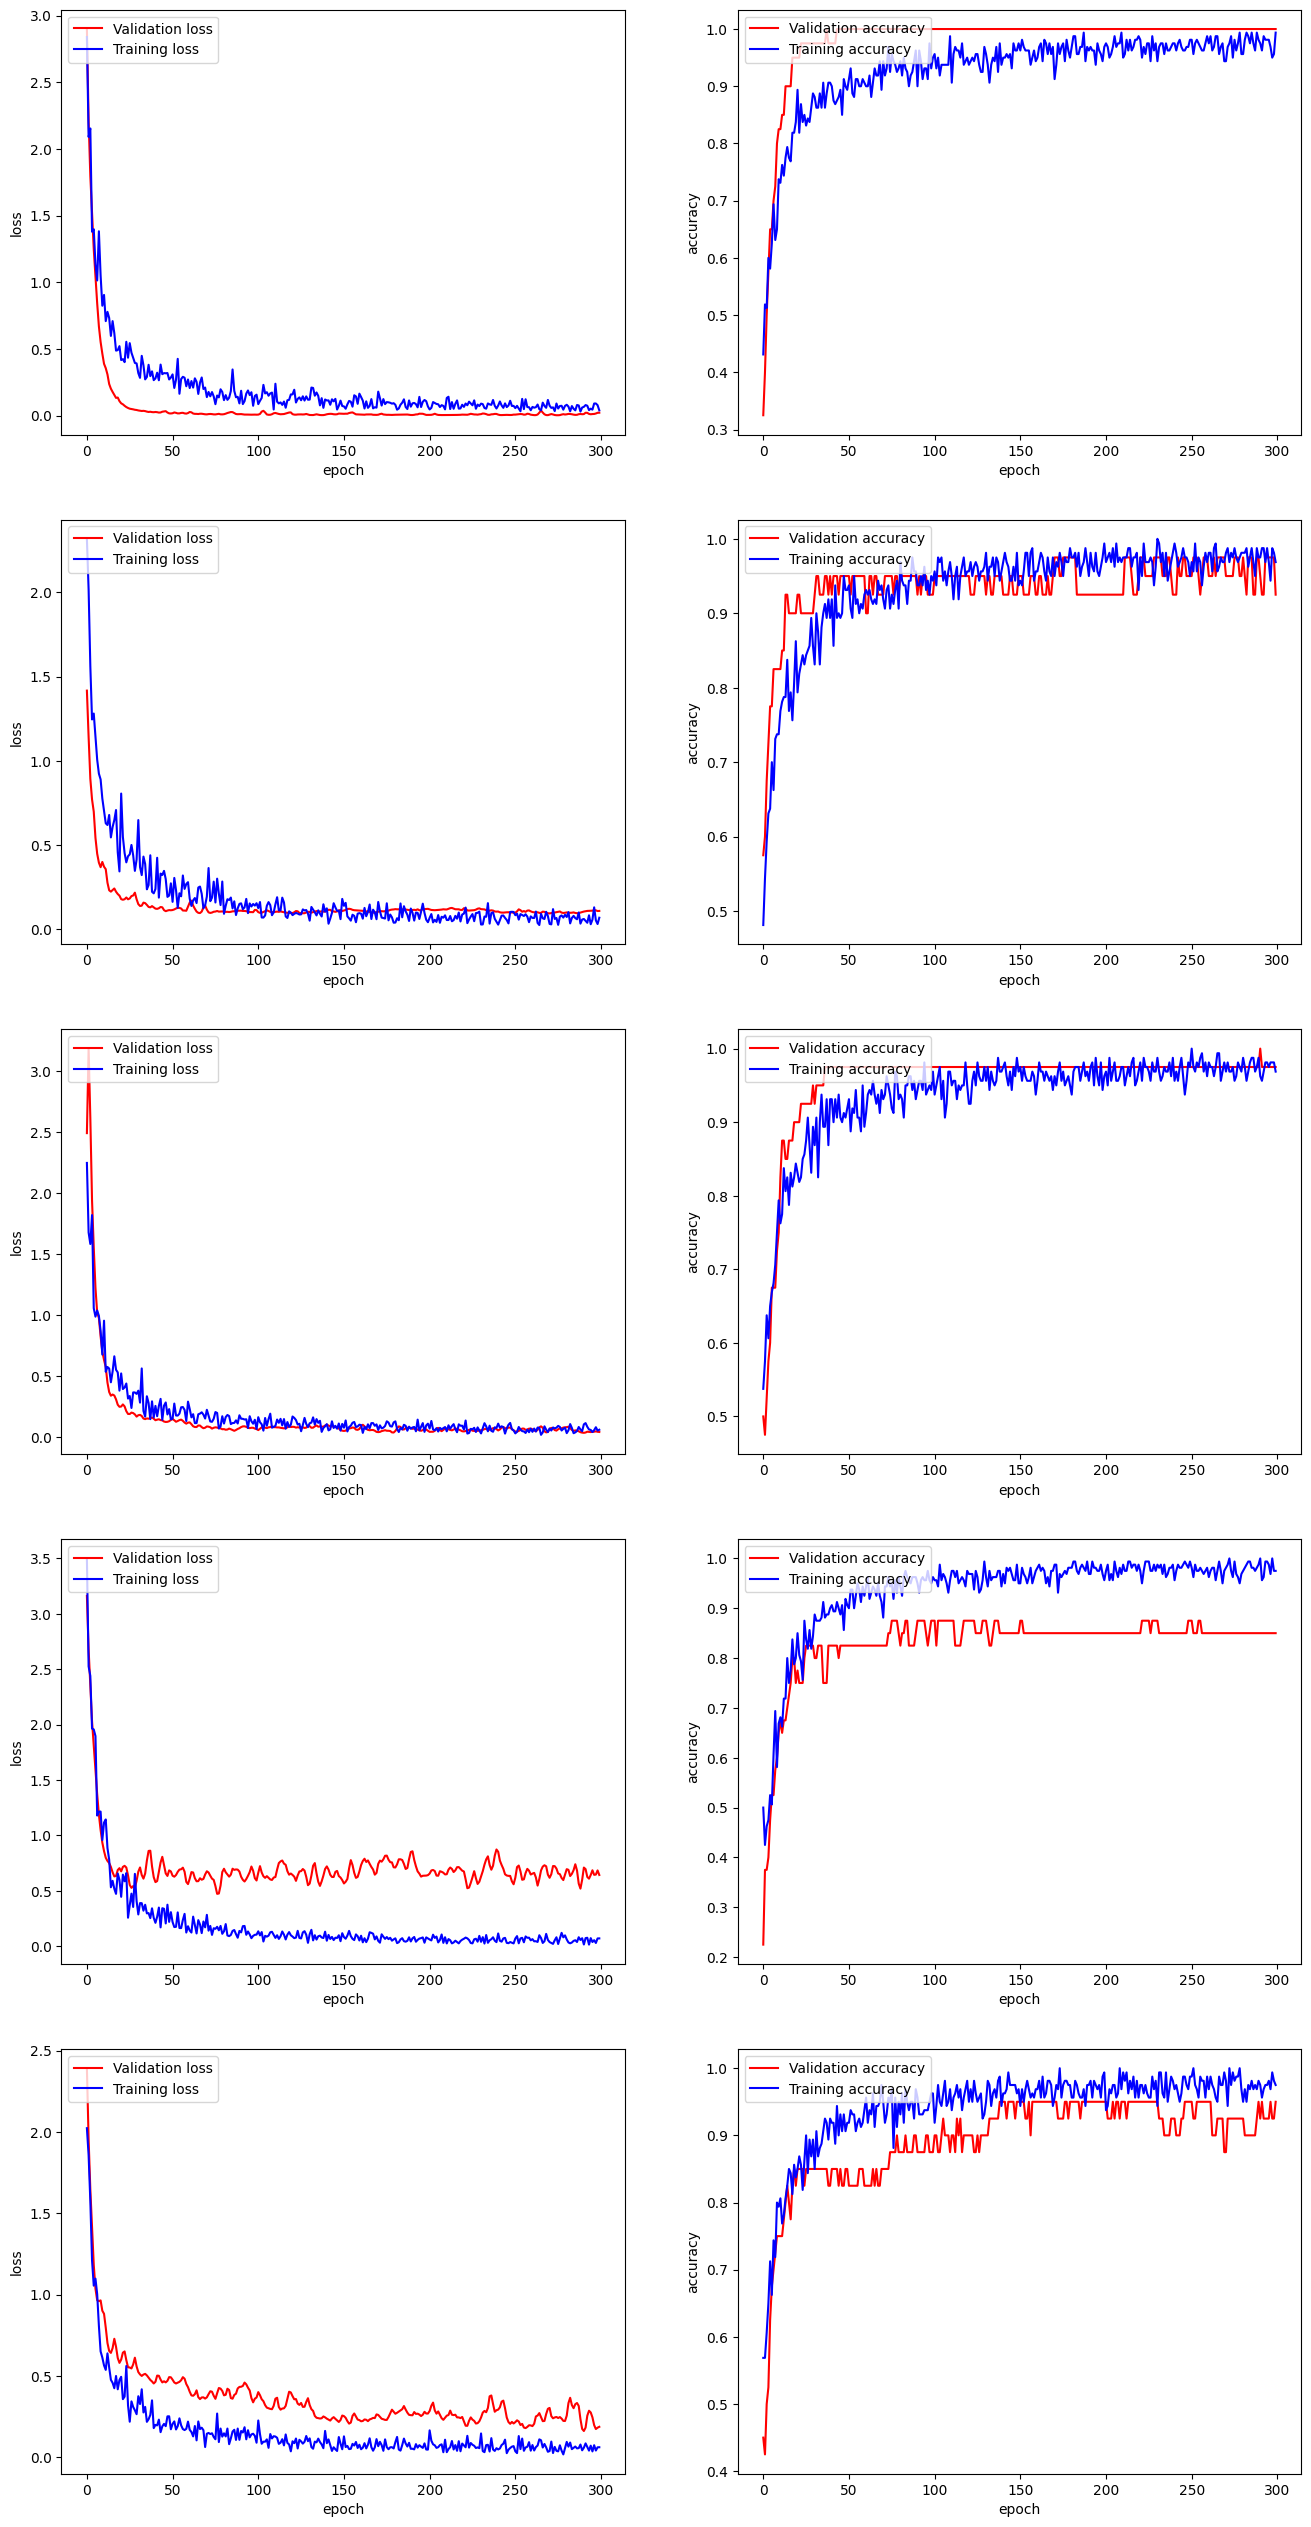

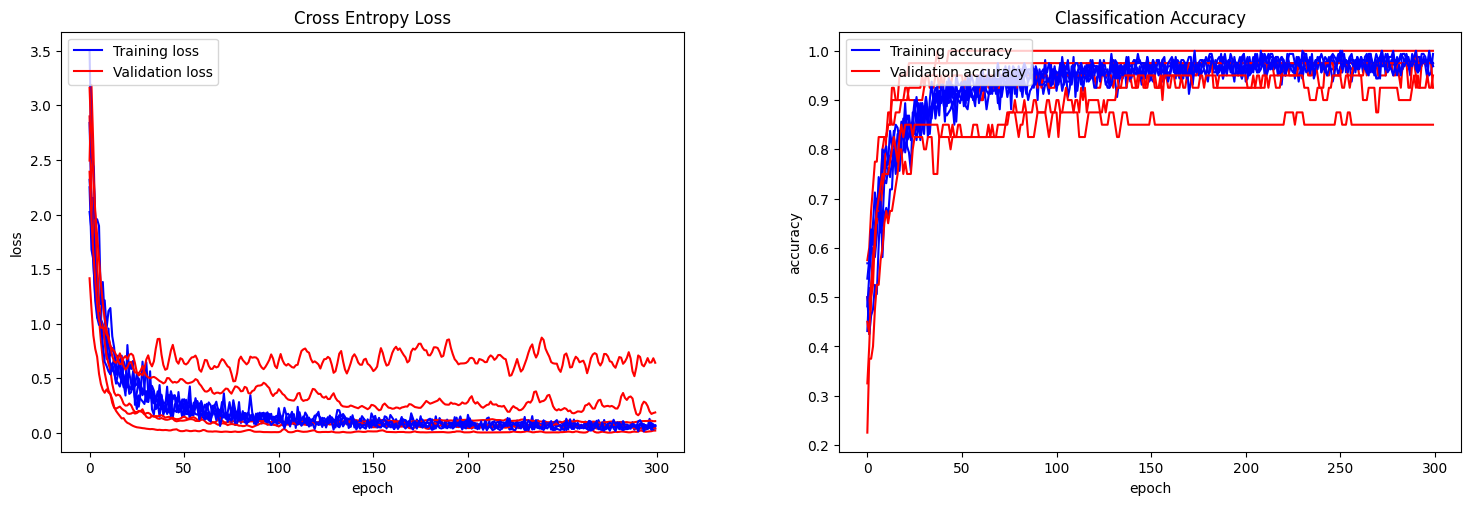

Accuracy: mean=94.000 std=5.148, n=5


In [ ]:
#VGG16
IMG_SIZE = 160
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
  tf.keras.layers.RandomZoom(0.2, fill_mode="nearest")
])

preprocess_input = tf.keras.applications.vgg16.preprocess_input

model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['elephant','Elephant_negative_class']
X,y=create_X_y (my_path,my_classes)

X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)
n_folds=5
epochs=300
batch_size=32

run_evaluation_tl(X_copy, y_copy, n_folds, epochs, batch_size, model)

In [ ]:
#resnet_v2
IMG_SIZE = 160
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
  tf.keras.layers.RandomZoom(0.2, fill_mode="nearest")
])

preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

model = tf.keras.applications.ResNet50V2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
my_path="Data_Project/Tiger-Fox-Elephant/"
my_classes=['elephant','Elephant_negative_class']
X,y=create_X_y (my_path,my_classes)

X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)
n_folds=5
epochs=300
batch_size=32

run_evaluation_tl(X_copy, y_copy, n_folds, epochs, batch_size, model)

Output hidden; open in https://colab.research.google.com to view.